<h><b>Part 1</b><h><br>
<p>Analysis of environment data<p>

<p2>The environment data contains three datasets<p2><br>
<p2>Drinking water -> Percentage of population using at least basic drinking water services.<p2><br>
<p2>CO2 -> The amount of CO2 emission (metric tons per capita)<p2><br>
<p2>Forest -> Forest area (% of land area)<p2><br>
<p2>Regions -> Regions that countries belong to.<p2>

<b>Import data and useful library.</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.set(rc = {'figure.figsize':(10,7)})

water = pd.read_excel("/mnt/d/mywork/Stat/basic_drinking_water.xlsx")
co2 = pd.read_excel("/mnt/d/mywork/Stat/co2.xlsx")
forest = pd.read_excel("/mnt/d/mywork/Stat/forest_land.xlsx")
region = pd.read_excel("/mnt/d/mywork/Stat/countries_regions.xlsx")
region.set_index("CountryName",inplace=True)

<h><b>Data Cleansing<b><h>
<p>All data has been observed in Microsoft Excel.<p>

Replace .. in xlsx using np.nan.

In [2]:
water = water.replace("..",np.nan)
co2 = co2.replace("..",np.nan)
forest = forest.replace("..",np.nan)

Drop country code,series name and series code.

In [3]:
cols = [1,2,3]
water.drop(water.columns[cols],axis=1,inplace=True)
co2.drop(co2.columns[cols],axis=1,inplace=True)
forest.drop(forest.columns[cols],axis=1,inplace=True)
water.drop(water.index[217:222],inplace=True)
co2.drop(co2.index[217:222],inplace=True)
forest.drop(forest.index[217:222],inplace=True)

In [4]:
water.head()

,Country Name,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.827846,53.403517,56.014043,58.659374,61.339781,64.054883,66.808703,69.601931,72.434219,75.091413
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.810887,92.228779,92.631595,93.020056,93.394325,93.754878,94.102097,94.436391,94.758223,95.068039
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.514994,92.745188,92.970884,93.192351,93.409562,93.622777,93.831977,94.037413,94.239140,94.437330
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.309766,99.387100,99.464435,99.541769,99.619103,99.696437,99.773772,99.773772,99.773772,99.773772
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.999998,100.000004,99.999995,100.000001,99.999998,99.999995,99.999999,100.000001,100.000004,100.000004


In [5]:
co2.head()

,Country Name,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,0.238473,0.206030,0.098719,0.085986,0.076131,0.069020,0.062588,0.056827,0.053197,...,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151,NaN,NaN
1,Albania,1.840841,1.258116,0.689859,0.641406,0.667179,0.611710,0.621837,0.470098,0.575350,...,1.734823,1.579092,1.654524,1.806789,1.759987,1.714126,1.948872,1.939732,NaN,NaN
2,Algeria,2.635597,2.535561,2.447802,2.658535,2.535995,2.540181,2.439998,2.448645,2.468805,...,3.222460,3.387555,3.406123,3.566209,3.674233,3.535020,3.505748,3.591657,NaN,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,6.991595,7.307441,7.639539,...,5.850886,5.944654,5.942801,5.807128,6.026182,6.080600,6.104134,5.973405,NaN,NaN


In [6]:
forest.head()

,Country Name,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,...,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994
1,Albania,28.788321,28.717153,28.645985,28.574818,28.503650,28.432482,28.361314,28.290146,28.218978,...,28.594653,28.646606,28.698558,28.750511,28.802464,28.802190,28.792062,28.791971,28.791971,28.791971
2,Algeria,0.699908,0.696214,0.692519,0.688824,0.685129,0.681435,0.677740,0.674045,0.670350,...,0.808485,0.811675,0.814866,0.818057,0.821248,0.821248,0.815790,0.810332,0.814110,0.818309
3,American Samoa,90.350000,90.180000,90.010000,89.840000,89.670000,89.500000,89.330000,89.160000,88.990000,...,87.000000,86.850000,86.700000,86.550000,86.400000,86.250000,86.100000,85.950000,85.800000,85.650000
4,Andorra,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,...,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553


Rename columns.

In [7]:
years = ["CountryName"]
years += [str(i) for i in range(1990,2021)]
water.set_axis(years,axis=1,inplace=True)
co2.set_axis(years,axis=1,inplace=True)
forest.set_axis(years,axis=1,inplace=True)


In [8]:
water.head()

,CountryName,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.827846,53.403517,56.014043,58.659374,61.339781,64.054883,66.808703,69.601931,72.434219,75.091413
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.810887,92.228779,92.631595,93.020056,93.394325,93.754878,94.102097,94.436391,94.758223,95.068039
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.514994,92.745188,92.970884,93.192351,93.409562,93.622777,93.831977,94.037413,94.239140,94.437330
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.309766,99.387100,99.464435,99.541769,99.619103,99.696437,99.773772,99.773772,99.773772,99.773772
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.999998,100.000004,99.999995,100.000001,99.999998,99.999995,99.999999,100.000001,100.000004,100.000004


In [9]:
co2.head()

,CountryName,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,0.238473,0.206030,0.098719,0.085986,0.076131,0.069020,0.062588,0.056827,0.053197,...,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151,NaN,NaN
1,Albania,1.840841,1.258116,0.689859,0.641406,0.667179,0.611710,0.621837,0.470098,0.575350,...,1.734823,1.579092,1.654524,1.806789,1.759987,1.714126,1.948872,1.939732,NaN,NaN
2,Algeria,2.635597,2.535561,2.447802,2.658535,2.535995,2.540181,2.439998,2.448645,2.468805,...,3.222460,3.387555,3.406123,3.566209,3.674233,3.535020,3.505748,3.591657,NaN,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,6.991595,7.307441,7.639539,...,5.850886,5.944654,5.942801,5.807128,6.026182,6.080600,6.104134,5.973405,NaN,NaN


In [10]:
forest.head()

,CountryName,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,...,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994
1,Albania,28.788321,28.717153,28.645985,28.574818,28.503650,28.432482,28.361314,28.290146,28.218978,...,28.594653,28.646606,28.698558,28.750511,28.802464,28.802190,28.792062,28.791971,28.791971,28.791971
2,Algeria,0.699908,0.696214,0.692519,0.688824,0.685129,0.681435,0.677740,0.674045,0.670350,...,0.808485,0.811675,0.814866,0.818057,0.821248,0.821248,0.815790,0.810332,0.814110,0.818309
3,American Samoa,90.350000,90.180000,90.010000,89.840000,89.670000,89.500000,89.330000,89.160000,88.990000,...,87.000000,86.850000,86.700000,86.550000,86.400000,86.250000,86.100000,85.950000,85.800000,85.650000
4,Andorra,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,...,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553


Set Indexes.

In [11]:
water.set_index("CountryName",inplace=True)
water.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.827846,53.403517,56.014043,58.659374,61.339781,64.054883,66.808703,69.601931,72.434219,75.091413
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.810887,92.228779,92.631595,93.020056,93.394325,93.754878,94.102097,94.436391,94.758223,95.068039
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.514994,92.745188,92.970884,93.192351,93.409562,93.622777,93.831977,94.037413,94.239140,94.437330
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.309766,99.387100,99.464435,99.541769,99.619103,99.696437,99.773772,99.773772,99.773772,99.773772
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.999998,100.000004,99.999995,100.000001,99.999998,99.999995,99.999999,100.000001,100.000004,100.000004


In [12]:
co2.set_index("CountryName",inplace=True)
co2.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.238473,0.206030,0.098719,0.085986,0.076131,0.069020,0.062588,0.056827,0.053197,0.040653,...,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151,NaN,NaN
Albania,1.840841,1.258116,0.689859,0.641406,0.667179,0.611710,0.621837,0.470098,0.575350,0.955359,...,1.734823,1.579092,1.654524,1.806789,1.759987,1.714126,1.948872,1.939732,NaN,NaN
Algeria,2.635597,2.535561,2.447802,2.658535,2.535995,2.540181,2.439998,2.448645,2.468805,2.532050,...,3.222460,3.387555,3.406123,3.566209,3.674233,3.535020,3.505748,3.591657,NaN,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,6.991595,7.307441,7.639539,7.923192,...,5.850886,5.944654,5.942801,5.807128,6.026182,6.080600,6.104134,5.973405,NaN,NaN


In [13]:
forest.set_index("CountryName",inplace=True)
forest.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,...,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994
Albania,28.788321,28.717153,28.645985,28.574818,28.503650,28.432482,28.361314,28.290146,28.218978,28.147810,...,28.594653,28.646606,28.698558,28.750511,28.802464,28.802190,28.792062,28.791971,28.791971,28.791971
Algeria,0.699908,0.696214,0.692519,0.688824,0.685129,0.681435,0.677740,0.674045,0.670350,0.666655,...,0.808485,0.811675,0.814866,0.818057,0.821248,0.821248,0.815790,0.810332,0.814110,0.818309
American Samoa,90.350000,90.180000,90.010000,89.840000,89.670000,89.500000,89.330000,89.160000,88.990000,88.820000,...,87.000000,86.850000,86.700000,86.550000,86.400000,86.250000,86.100000,85.950000,85.800000,85.650000
Andorra,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,...,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553


<b><h>Analyze drinking water data.<h><b>

Find year to represent the past and the present.

In [14]:
water.iloc[:,0:20].isna().sum()

1990    217
1991    217
1992    217
1993    217
1994    217
1995    217
1996    217
1997    217
1998    217
1999    217
2000     12
2001      9
2002      7
2003      7
2004      7
2005      5
2006      4
2007      4
2008      5
2009      3
dtype: int64

In [15]:
water.iloc[:,20:].isna().sum()

2010     3
2011     2
2012     2
2013     2
2014     2
2015     2
2016     2
2017     6
2018    14
2019    16
2020    20
dtype: int64

<p1>Since 2006 and 2016 have a span of 10 years and both years have a low null value,<p1><br>
<p1>We will choose 2006 to represent the past and 2016 to represent the present.<p1>

First we need to join the regions data.

In [16]:
water_analyze = water.join(region,how="left")
water_analyze.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,Region,ThirdWorld
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.014043,58.659374,61.339781,64.054883,66.808703,69.601931,72.434219,75.091413,South Asia,1.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.631595,93.020056,93.394325,93.754878,94.102097,94.436391,94.758223,95.068039,Eastern Europe,0.0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.970884,93.192351,93.409562,93.622777,93.831977,94.037413,94.239140,94.437330,Africa,0.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.464435,99.541769,99.619103,99.696437,99.773772,99.773772,99.773772,99.773772,Australia and Oceanea,0.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.999995,100.000001,99.999998,99.999995,99.999999,100.000001,100.000004,100.000004,Western Europe,0.0


Plot % Drinking water in each region in 2006.

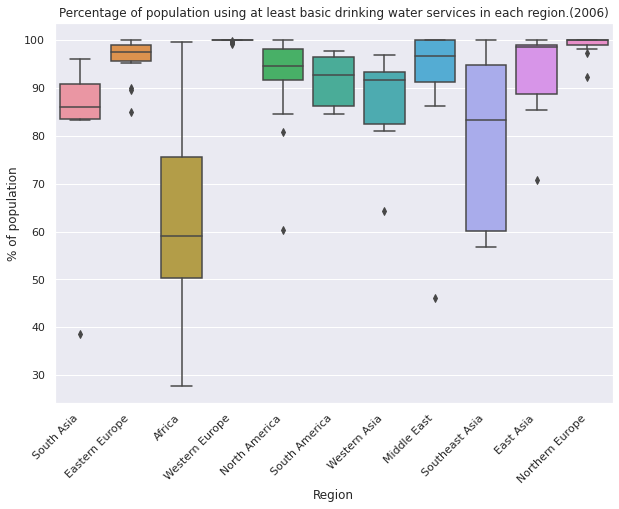

In [17]:
#Graph with outliers
water2006 = sns.boxplot(x="Region",y="2006",data=water_analyze[:][(water_analyze["Region"]!="Australia and Oceanea") & (water_analyze["Region"]!="Thailand")])
water2006.set(title="Percentage of population using at least basic drinking water services in each region.(2006)",ylabel="% of population")
water2006.set_xticklabels(water2006.get_xticklabels(), rotation=45, horizontalalignment='right')
water2006 = water2006.get_figure()

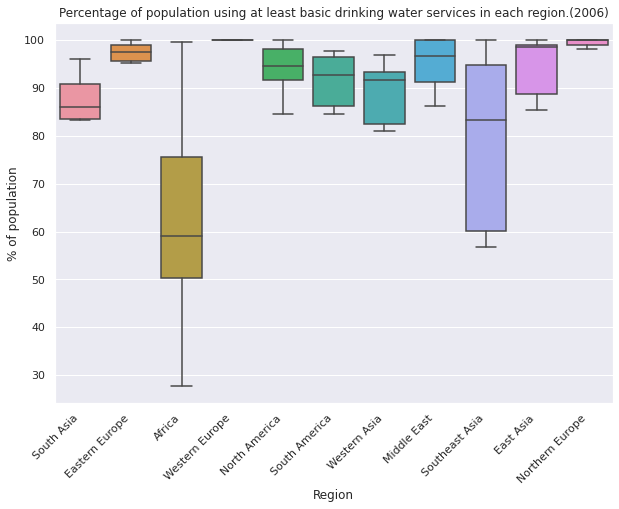

In [18]:
#Graph without outliers
water2006_no = sns.boxplot(x="Region",y="2006",showfliers=False,data=water_analyze[:][(water_analyze["Region"]!="Australia and Oceanea") & (water_analyze["Region"]!="Thailand")])
water2006_no.set(title="Percentage of population using at least basic drinking water services in each region.(2006)",ylabel="% of population")
water2006_no.set_xticklabels(water2006_no.get_xticklabels(), rotation=45, horizontalalignment='right')
water2006_no = water2006_no.get_figure()

Plot % Drinking water in each region in 2016.

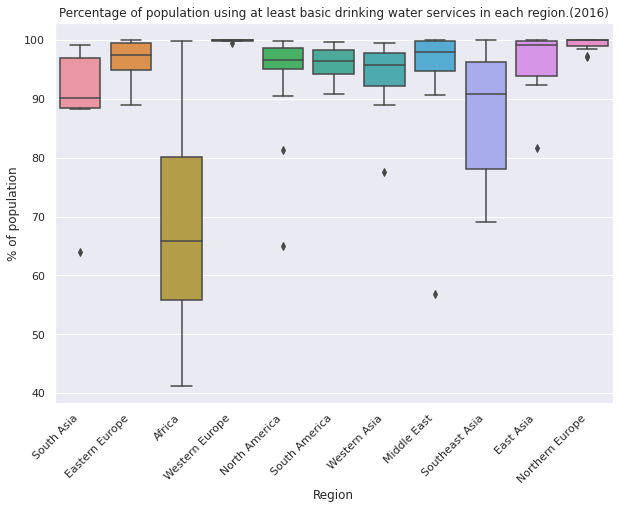

In [19]:
#Graph with outliers.
water2016 = sns.boxplot(x="Region",y="2016",data=water_analyze[:][(water_analyze["Region"]!="Australia and Oceanea") & (water_analyze["Region"]!="Thailand")])
water2016.set(title="Percentage of population using at least basic drinking water services in each region.(2016)",ylabel="% of population")
water2016.set_xticklabels(water2016.get_xticklabels(), rotation=45, horizontalalignment='right')
water2016 = water2006.get_figure()

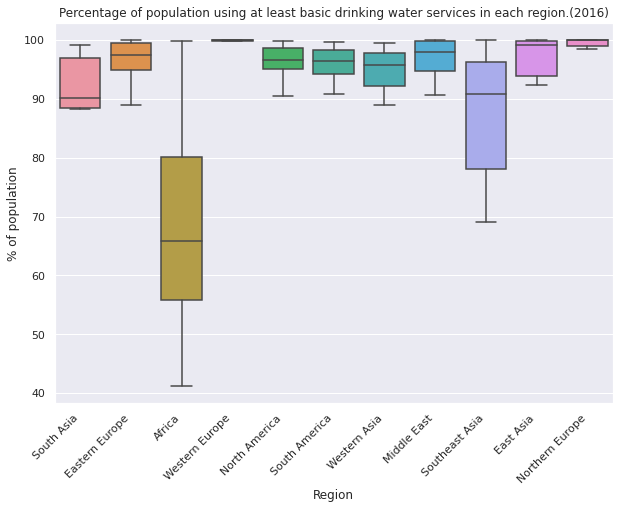

In [20]:
#Graph without outliers
water2016_no = sns.boxplot(x="Region",y="2016",showfliers=False,data=water_analyze[:][(water_analyze["Region"]!="Australia and Oceanea") & (water_analyze["Region"]!="Thailand")])
water2016_no.set(title="Percentage of population using at least basic drinking water services in each region.(2016)",ylabel="% of population")
water2016_no.set_xticklabels(water2016_no.get_xticklabels(), rotation=45, horizontalalignment='right')
water2016_no = water2016_no.get_figure()

<b><h>Analyze CO2 emission data.<h><b>

Find year to represent the past and the present.

In [21]:
co2.iloc[:,0:20].isna().sum()

1990    27
1991    26
1992    27
1993    27
1994    27
1995    26
1996    26
1997    26
1998    26
1999    26
2000    26
2001    26
2002    26
2003    26
2004    26
2005    26
2006    26
2007    26
2008    26
2009    26
dtype: int64

In [22]:
co2.iloc[:,20:].isna().sum()

2010     26
2011     26
2012     26
2013     26
2014     26
2015     26
2016     26
2017     26
2018     26
2019    217
2020    217
dtype: int64

<p1>Since 2006 and 2016 have a span of 10 years and both years have a low null value,<p1><br>
<p1>We will choose 2006 to represent the past and 2016 to represent the present.<p1>

First we need to join the regions data.

In [23]:
co2_analyze = co2.join(region,how="left")
co2.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.238473,0.206030,0.098719,0.085986,0.076131,0.069020,0.062588,0.056827,0.053197,0.040653,...,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151,NaN,NaN
Albania,1.840841,1.258116,0.689859,0.641406,0.667179,0.611710,0.621837,0.470098,0.575350,0.955359,...,1.734823,1.579092,1.654524,1.806789,1.759987,1.714126,1.948872,1.939732,NaN,NaN
Algeria,2.635597,2.535561,2.447802,2.658535,2.535995,2.540181,2.439998,2.448645,2.468805,2.532050,...,3.222460,3.387555,3.406123,3.566209,3.674233,3.535020,3.505748,3.591657,NaN,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,6.991595,7.307441,7.639539,7.923192,...,5.850886,5.944654,5.942801,5.807128,6.026182,6.080600,6.104134,5.973405,NaN,NaN


Plot the amount of CO2 emission (metric tons per capita) in each region in 2006.

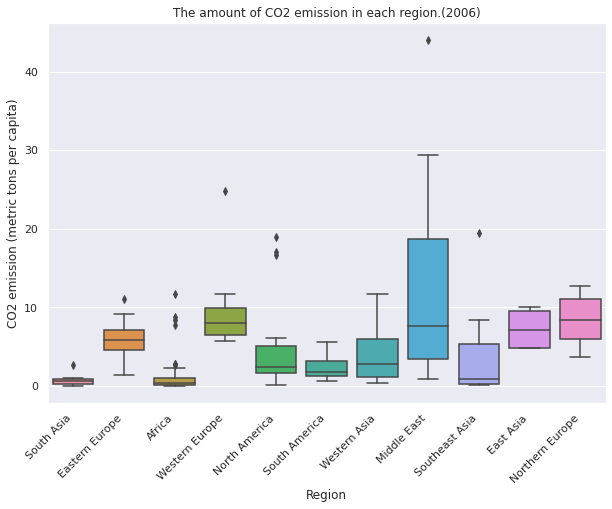

In [24]:
#Graph with outliers
co2006 = sns.boxplot(x="Region",y="2006",data=co2_analyze[:][(co2_analyze["Region"]!="Australia and Oceanea") & (co2_analyze["Region"]!="Thailand")])
co2006.set(title="The amount of CO2 emission in each region.(2006)",ylabel="CO2 emission (metric tons per capita)")
co2006.set_xticklabels(co2006.get_xticklabels(), rotation=45, horizontalalignment='right')
co2006 = co2006.get_figure()

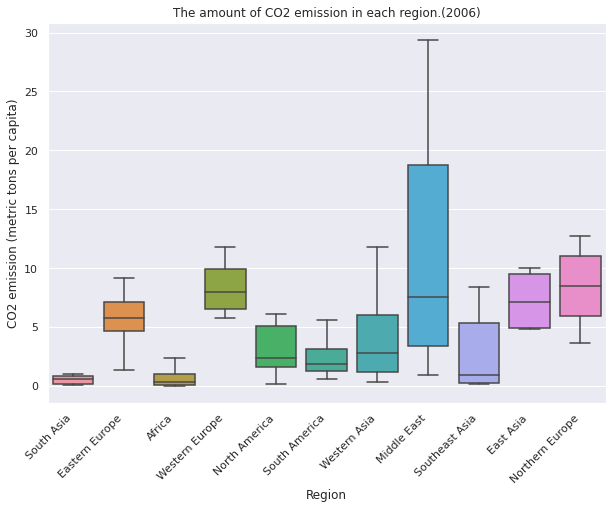

In [25]:
#Graph without outliers
co2006_no = sns.boxplot(x="Region",y="2006",showfliers=False,data=co2_analyze[:][(co2_analyze["Region"]!="Australia and Oceanea") & (co2_analyze["Region"]!="Thailand")])
co2006_no.set(title="The amount of CO2 emission in each region.(2006)",ylabel="CO2 emission (metric tons per capita)")
co2006_no.set_xticklabels(co2006_no.get_xticklabels(), rotation=45, horizontalalignment='right')
co2006_no = co2006_no.get_figure()

Plot the amount of CO2 emission (metric tons per capita) in each region in 2016.

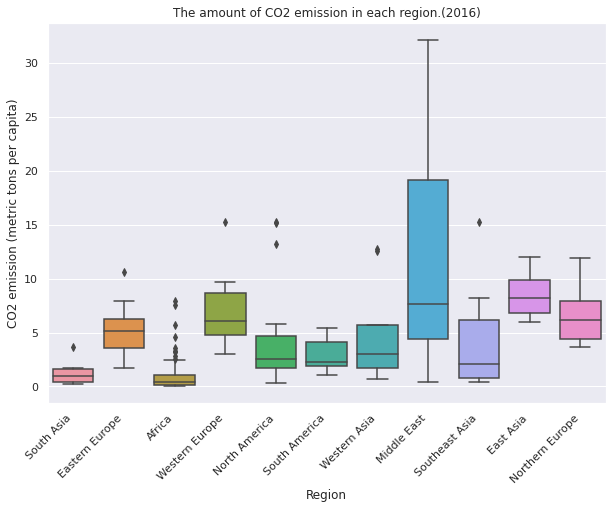

In [26]:
#Graph with outliers
co2016 = sns.boxplot(x="Region",y="2016",data=co2_analyze[:][(co2_analyze["Region"]!="Australia and Oceanea") & (co2_analyze["Region"]!="Thailand")])
co2016.set(title="The amount of CO2 emission in each region.(2016)",ylabel="CO2 emission (metric tons per capita)")
co2016.set_xticklabels(co2016.get_xticklabels(), rotation=45, horizontalalignment='right')
co2016 = co2016.get_figure()

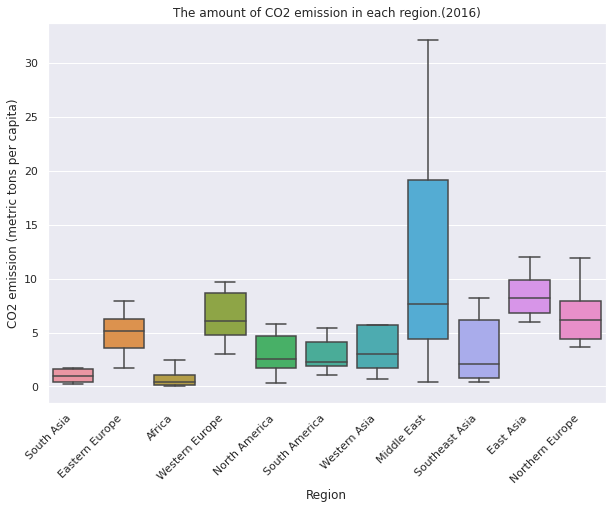

In [27]:
#Graph without outliers
co2016_no = sns.boxplot(x="Region",y="2016",showfliers=False,data=co2_analyze[:][(co2_analyze["Region"]!="Australia and Oceanea") & (co2_analyze["Region"]!="Thailand")])
co2016_no.set(title="The amount of CO2 emission in each region.(2016)",ylabel="CO2 emission (metric tons per capita)")
co2016_no.set_xticklabels(co2016_no.get_xticklabels(), rotation=45, horizontalalignment='right')
co2016_no = co2016_no.get_figure()

<b><h>Analyze forest data<h><b>

Find year to represent the past and the present.

In [28]:
forest.iloc[:,0:20].isna().sum()

1990    12
1991     8
1992     8
1993     8
1994     8
1995     8
1996     8
1997     8
1998     8
1999     8
2000     4
2001     7
2002     7
2003     7
2004     7
2005     7
2006     7
2007     7
2008     7
2009     7
dtype: int64

In [29]:
forest.iloc[:,20:].isna().sum()

2010    4
2011    3
2012    3
2013    3
2014    3
2015    3
2016    3
2017    3
2018    3
2019    7
2020    7
dtype: int64

<p1>Since 2006 and 2016 have a span of 10 years and both years have a low null value,<p1><br>
<p1>We will choose 2006 to represent the past and 2016 to represent the present.<p1>

First we need to join the regions data.

In [30]:
forest_analyze = forest.join(region,how="left")
forest_analyze.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,Region,ThirdWorld
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,...,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,South Asia,1.0
Albania,28.788321,28.717153,28.645985,28.574818,28.503650,28.432482,28.361314,28.290146,28.218978,28.147810,...,28.698558,28.750511,28.802464,28.802190,28.792062,28.791971,28.791971,28.791971,Eastern Europe,0.0
Algeria,0.699908,0.696214,0.692519,0.688824,0.685129,0.681435,0.677740,0.674045,0.670350,0.666655,...,0.814866,0.818057,0.821248,0.821248,0.815790,0.810332,0.814110,0.818309,Africa,0.0
American Samoa,90.350000,90.180000,90.010000,89.840000,89.670000,89.500000,89.330000,89.160000,88.990000,88.820000,...,86.700000,86.550000,86.400000,86.250000,86.100000,85.950000,85.800000,85.650000,Australia and Oceanea,0.0
Andorra,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,...,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,Western Europe,0.0


Plot forest area (% of land area) in each region in 2006.

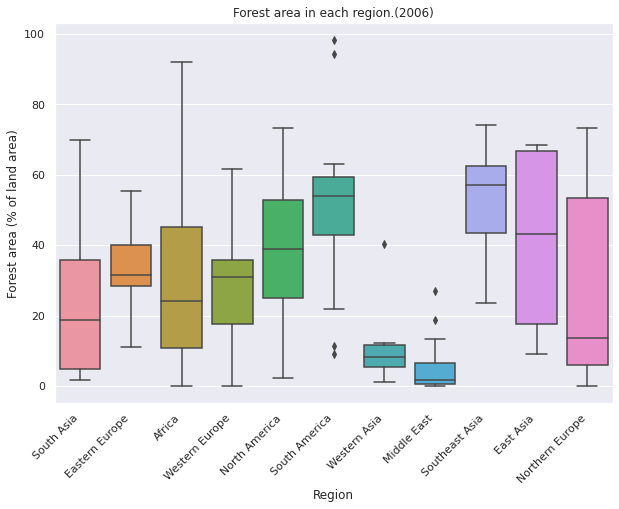

In [31]:
#Graph with outliers
forest2006 = sns.boxplot(x="Region",y="2006",data=forest_analyze[:][(forest_analyze["Region"]!="Australia and Oceanea") & (forest_analyze["Region"]!="Thailand")])
forest2006.set(title="Forest area in each region.(2006)",ylabel="Forest area (% of land area)")
forest2006.set_xticklabels(forest2006.get_xticklabels(), rotation=45, horizontalalignment='right')
forest2006 = forest2006.get_figure()

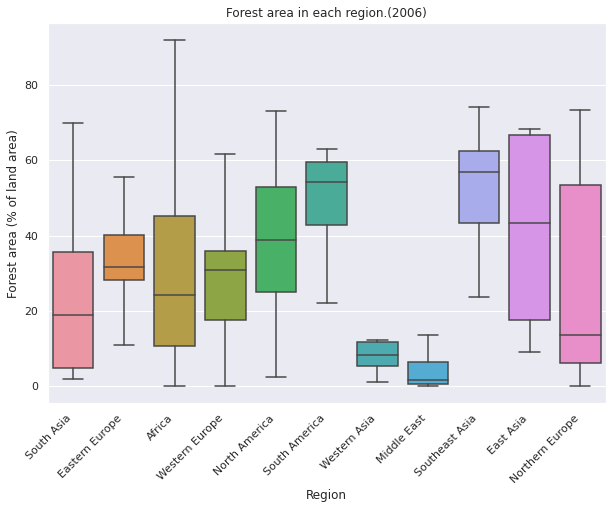

In [32]:
#Graph without outliers
forest2006_no = sns.boxplot(x="Region",y="2006",showfliers=False,data=forest_analyze[:][(forest_analyze["Region"]!="Australia and Oceanea") & (forest_analyze["Region"]!="Thailand")])
forest2006_no.set(title="Forest area in each region.(2006)",ylabel="Forest area (% of land area)")
forest2006_no.set_xticklabels(forest2006_no.get_xticklabels(), rotation=45, horizontalalignment='right')
forest2006_no = forest2006_no.get_figure()

Plot forest area (% of land area) in each region in 2016.

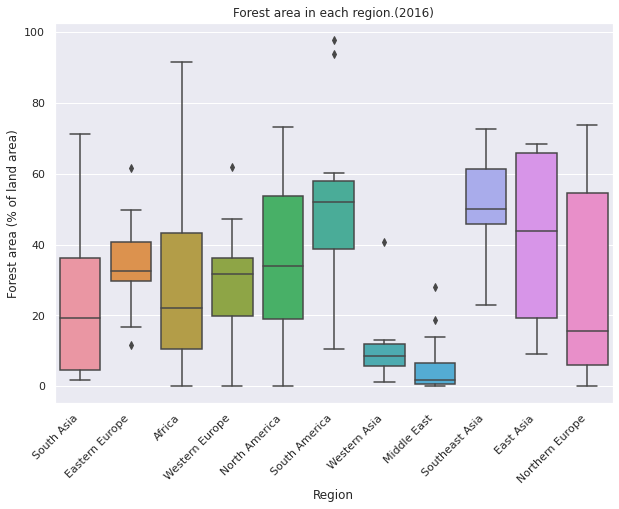

In [33]:
#Graph with outliers
forest2016 = sns.boxplot(x="Region",y="2016",data=forest_analyze[:][(forest_analyze["Region"]!="Australia and Oceanea") & (forest_analyze["Region"]!="Thailand")])
forest2016.set(title="Forest area in each region.(2016)",ylabel="Forest area (% of land area)")
forest2016.set_xticklabels(forest2016.get_xticklabels(), rotation=45, horizontalalignment='right')
forest2016 = forest2016.get_figure()

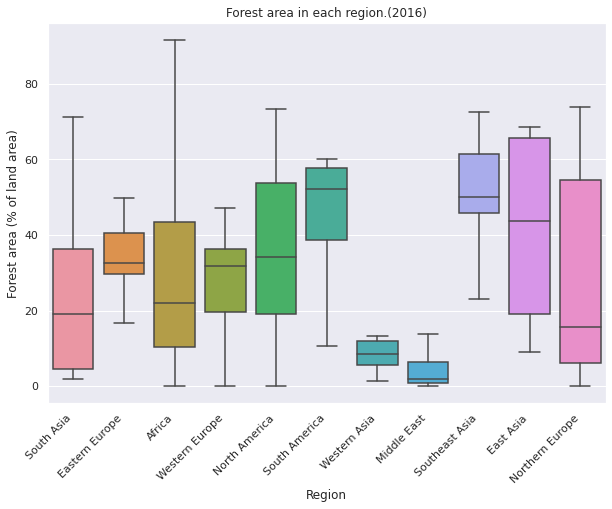

In [34]:
#Graph without outliers
forest2016_no = sns.boxplot(x="Region",y="2016",showfliers=False,data=forest_analyze[:][(forest_analyze["Region"]!="Australia and Oceanea") & (forest_analyze["Region"]!="Thailand")])
forest2016_no.set(title="Forest area in each region.(2016)",ylabel="Forest area (% of land area)")
forest2016_no.set_xticklabels(forest2016_no.get_xticklabels(), rotation=45, horizontalalignment='right')
forest2016_no = forest2016_no.get_figure()

<b><h>Part 2.1<h><b>

<b><p>In depth analysis of environment data in 3 regions.<p></b><br>
<p2>We are going to focus on North America, Middle East and South Asia.<p2>

Since we already chose 2006 and 2016 to represent the past and the present, we will continue using those years in this part.

But first we need to create function to get rid of outliers.

In [35]:
def remove_outlier_IQR(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

<b>Analyze drinking water data.

<i>North America

In [36]:
#North America 2006 data with outliers.
water2006 = water_analyze[water_analyze["Region"]=="North America"]
#North America 2006 data without outliers.
water2006_no = remove_outlier_IQR(water2006,"2006")
#North America 2016 data with outliers.
water2016 = water_analyze[water_analyze["Region"]=="North America"]
water2016_no = remove_outlier_IQR(water2016,"2016")

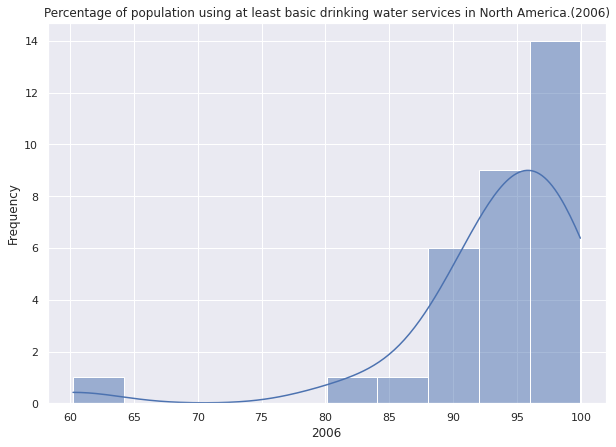

In [37]:
na_hist2006 = sns.histplot(x="2006",data=water2006,kde=True)
na_hist2006.set(title="Percentage of population using at least basic drinking water services in North America.(2006)",ylabel="Frequency")
na_hist2006 = na_hist2006.get_figure()

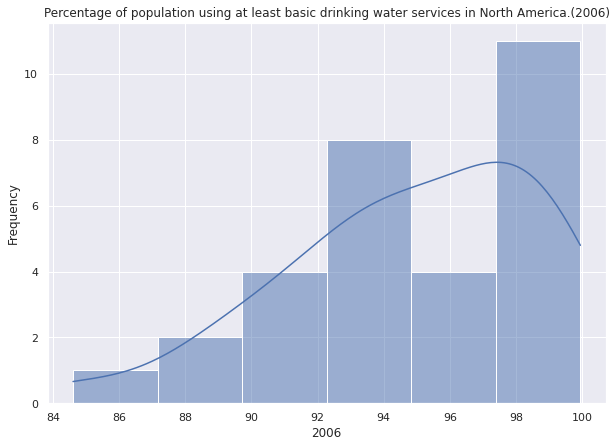

In [38]:
na_hist2006_no = sns.histplot(x="2006",data=water2006_no,kde=True)
na_hist2006_no.set(title="Percentage of population using at least basic drinking water services in North America.(2006)",ylabel="Frequency")
na_hist2006_no = na_hist2006_no.get_figure()

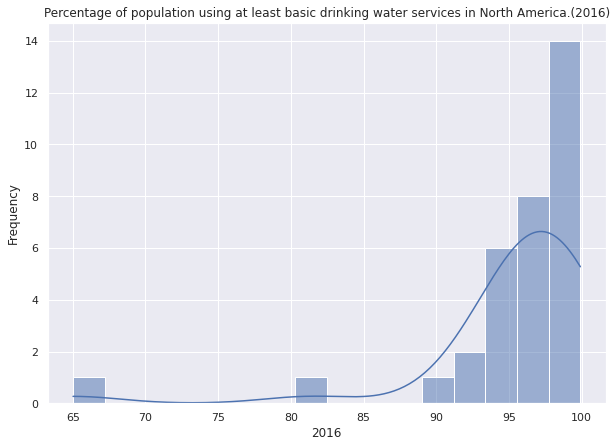

In [39]:
na_hist2016 = sns.histplot(x="2016",data=water2016,kde=True)
na_hist2016.set(title="Percentage of population using at least basic drinking water services in North America.(2016)",ylabel="Frequency")
na_hist2016 = na_hist2016.get_figure()

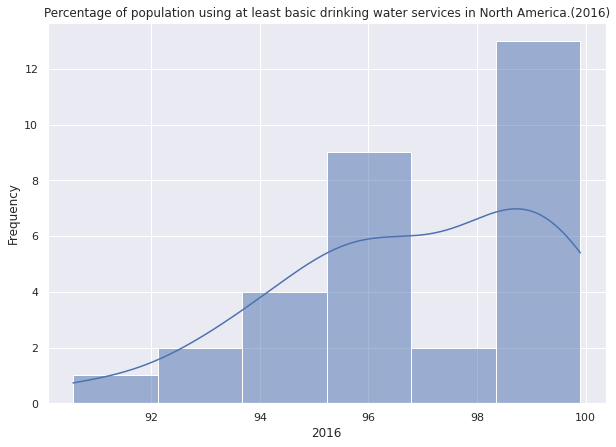

In [40]:
na_hist2016_no = sns.histplot(x="2016",data=water2016_no,kde=True)
na_hist2016_no.set(title="Percentage of population using at least basic drinking water services in North America.(2016)",ylabel="Frequency")
na_hist2016_no = na_hist2016_no.get_figure()

<i>Middle East

In [41]:
#Middle East 2006 data with outliers.
water2006 = water_analyze[water_analyze["Region"]=="Middle East"]
#Middle East 2006 data without outliers.
water2006_no = remove_outlier_IQR(water2006,"2006")
#Middle East 2016 data with outliers.
water2016 = water_analyze[water_analyze["Region"]=="Middle East"]
water2016_no = remove_outlier_IQR(water2016,"2016")

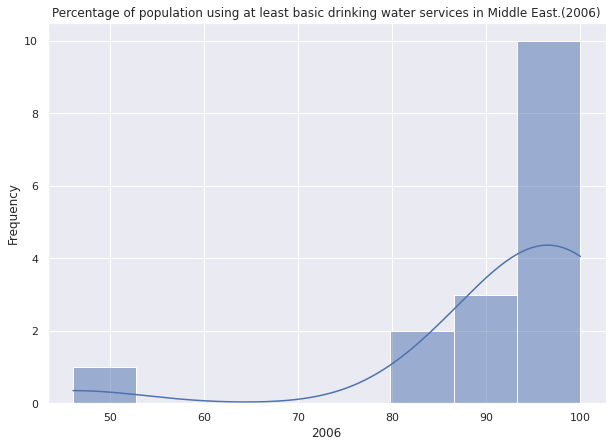

In [42]:
me_hist2006 = sns.histplot(x="2006",data=water2006,kde=True)
me_hist2006.set(title="Percentage of population using at least basic drinking water services in Middle East.(2006)",ylabel="Frequency")
me_hist2006 = me_hist2006.get_figure()

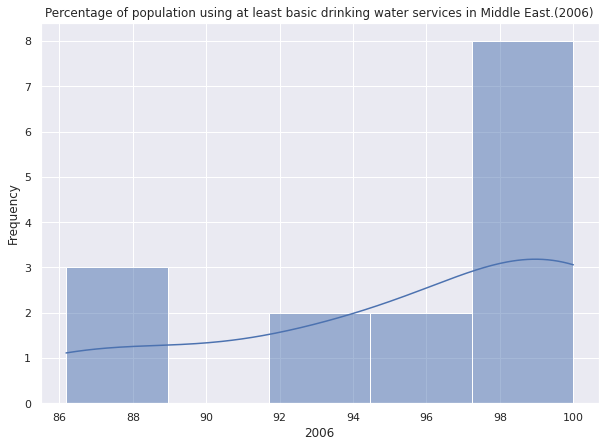

In [43]:
me_hist2006_no = sns.histplot(x="2006",data=water2006_no,kde=True)
me_hist2006_no.set(title="Percentage of population using at least basic drinking water services in Middle East.(2006)",ylabel="Frequency")
me_hist2006_no = me_hist2006_no.get_figure()

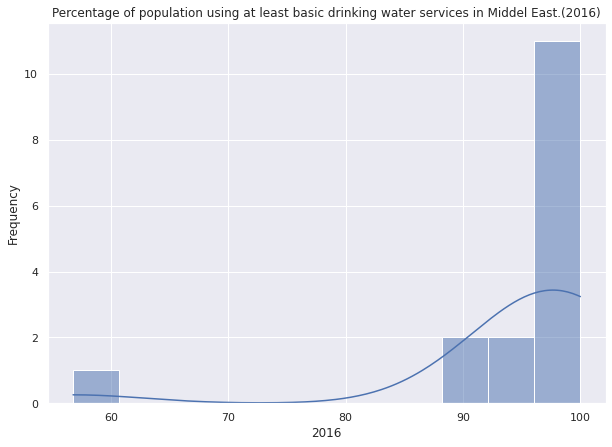

In [44]:
me_hist2016 = sns.histplot(x="2016",data=water2016,kde=True)
me_hist2016.set(title="Percentage of population using at least basic drinking water services in Middel East.(2016)",ylabel="Frequency")
me_hist2016 = me_hist2016.get_figure()

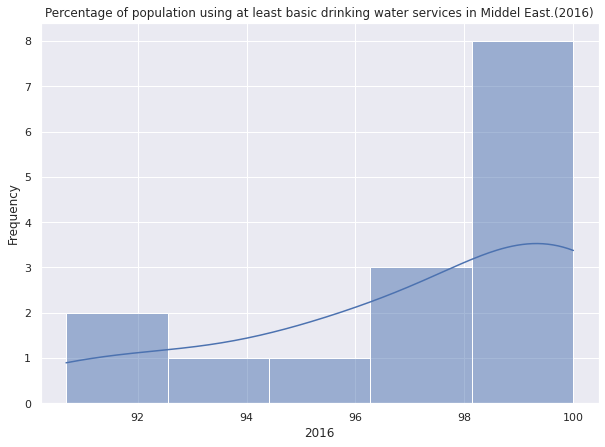

In [45]:
me_hist2016_no = sns.histplot(x="2016",data=water2016_no,kde=True)
me_hist2016_no.set(title="Percentage of population using at least basic drinking water services in Middel East.(2016)",ylabel="Frequency")
me_hist2016_no = me_hist2016_no.get_figure()

<i>South Asia

In [46]:
#South Asia 2006 data with outliers.
water2006 = water_analyze[water_analyze["Region"]=="South Asia"]
#South Asia 2006 data without outliers.
water2006_no = remove_outlier_IQR(water2006,"2006")
#South Asia 2016 data with outliers.
water2016 = water_analyze[water_analyze["Region"]=="South Asia"]
water2016_no = remove_outlier_IQR(water2016,"2016")

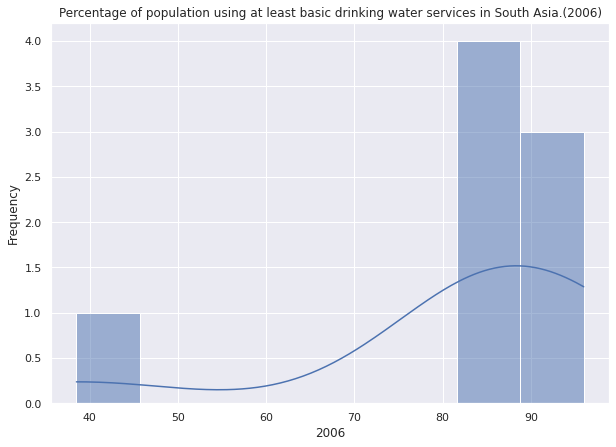

In [47]:
sa_hist2006 = sns.histplot(x="2006",data=water2006,kde=True)
sa_hist2006.set(title="Percentage of population using at least basic drinking water services in South Asia.(2006)",ylabel="Frequency")
sa_hist2006 = sa_hist2006.get_figure()

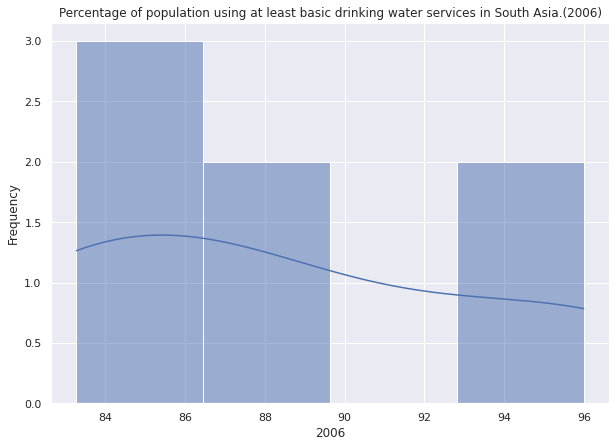

In [48]:
sa_hist2006_no = sns.histplot(x="2006",data=water2006_no,kde=True)
sa_hist2006_no.set(title="Percentage of population using at least basic drinking water services in South Asia.(2006)",ylabel="Frequency")
sa_hist2006_no = sa_hist2006_no.get_figure()

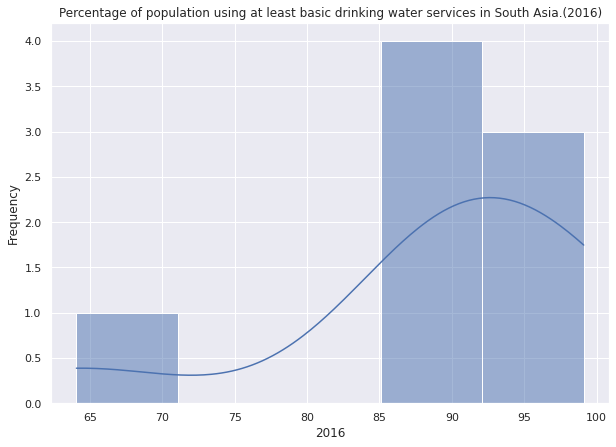

In [49]:
sa_hist2016 = sns.histplot(x="2016",data=water2016,kde=True)
sa_hist2016.set(title="Percentage of population using at least basic drinking water services in South Asia.(2016)",ylabel="Frequency")
sa_hist2016 = sa_hist2016.get_figure()

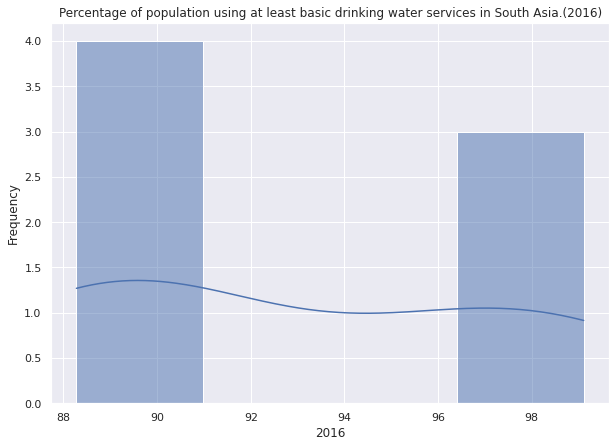

In [50]:
sa_hist2016_no = sns.histplot(x="2016",data=water2016_no,kde=True)
sa_hist2016_no.set(title="Percentage of population using at least basic drinking water services in South Asia.(2016)",ylabel="Frequency")
sa_hist2016_no = sa_hist2016_no.get_figure()

<b>Analyze CO2 emission.

<i>North America

In [51]:
#North America 2006 data with outliers.
co2006 = co2_analyze[co2_analyze["Region"]=="North America"]
#North America 2006 data without outliers.
co2006_no = remove_outlier_IQR(co2006,"2006")
#North America 2016 data with outliers.
co2016 = co2_analyze[co2_analyze["Region"]=="North America"]
co2016_no = remove_outlier_IQR(co2016,"2016")

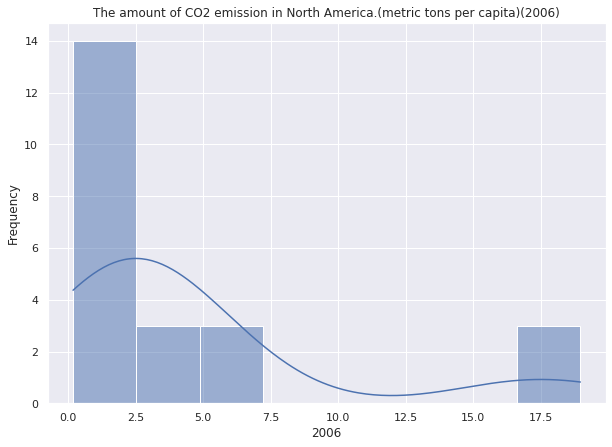

In [52]:
na_hist2006 = sns.histplot(x="2006",data=co2006,kde=True)
na_hist2006.set(title="The amount of CO2 emission in North America.(metric tons per capita)(2006)",ylabel="Frequency")
na_hist2006 = na_hist2006.get_figure()

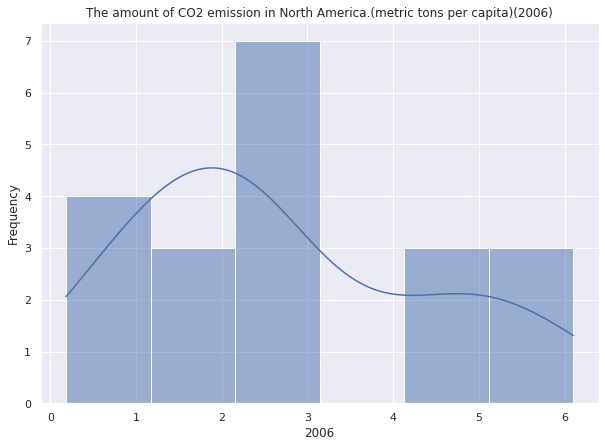

In [53]:
na_hist2006_no = sns.histplot(x="2006",data=co2006_no,kde=True)
na_hist2006_no.set(title="The amount of CO2 emission in North America.(metric tons per capita)(2006)",ylabel="Frequency")
na_hist2006_no = na_hist2006_no.get_figure()

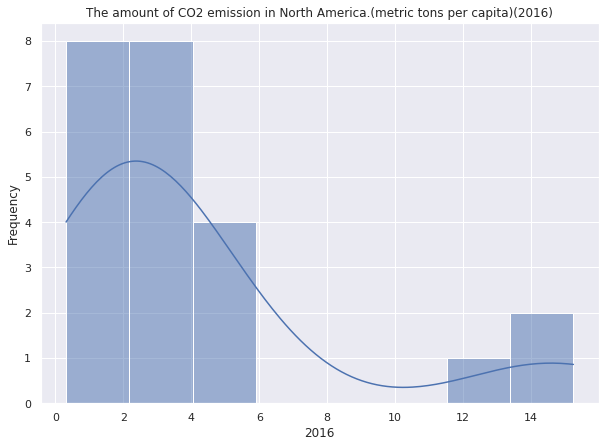

In [54]:
na_hist2016 = sns.histplot(x="2016",data=co2016,kde=True)
na_hist2016.set(title="The amount of CO2 emission in North America.(metric tons per capita)(2016)",ylabel="Frequency")
na_hist2016 = na_hist2016.get_figure()

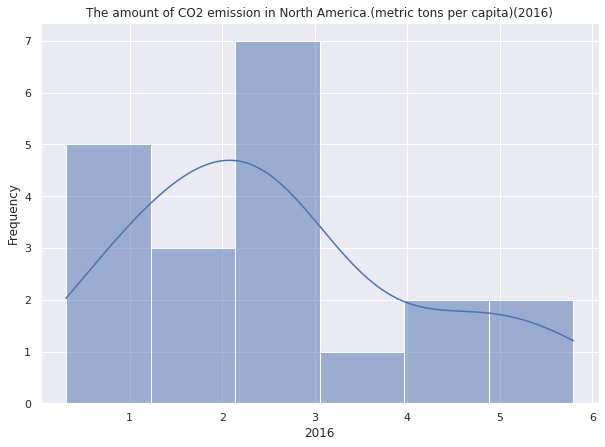

In [55]:
na_hist2016_no = sns.histplot(x="2016",data=co2016_no,kde=True)
na_hist2016_no.set(title="The amount of CO2 emission in North America.(metric tons per capita)(2016)",ylabel="Frequency")
na_hist2016_no = na_hist2016_no.get_figure()

<i>Middle East

In [56]:
#Middle East 2006 data with outliers.
co2006 = co2_analyze[co2_analyze["Region"]=="Middle East"]
#Middle East 2006 data without outliers.
co2006_no = remove_outlier_IQR(co2006,"2006")
#Middle East 2016 data with outliers.
co2016 = co2_analyze[co2_analyze["Region"]=="Middle East"]
co2016_no = remove_outlier_IQR(co2016,"2016")

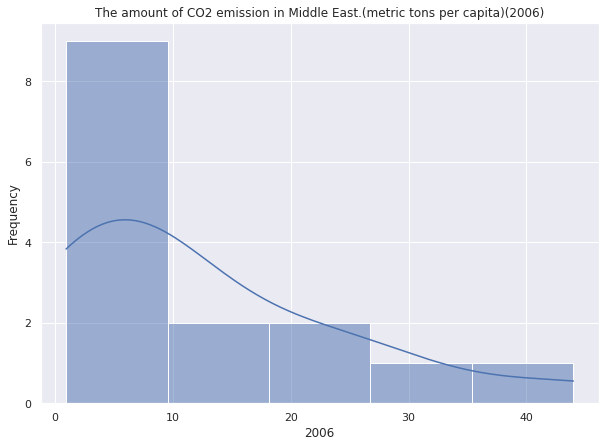

In [57]:
me_hist2006 = sns.histplot(x="2006",data=co2006,kde=True)
me_hist2006.set(title="The amount of CO2 emission in Middle East.(metric tons per capita)(2006)",ylabel="Frequency")
me_hist2006 = me_hist2006.get_figure()

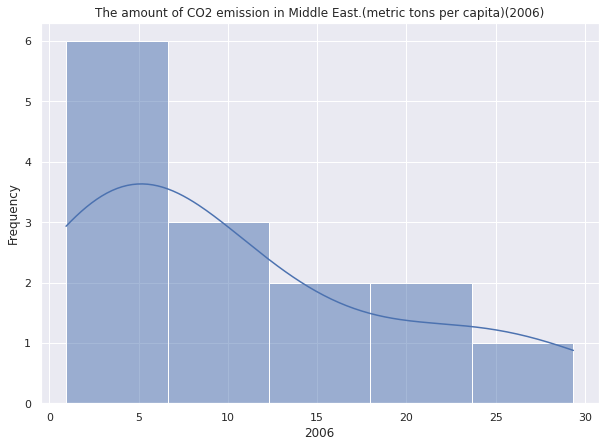

In [58]:
me_hist2006_no = sns.histplot(x="2006",data=co2006_no,kde=True)
me_hist2006_no.set(title="The amount of CO2 emission in Middle East.(metric tons per capita)(2006)",ylabel="Frequency")
me_hist2006_no = me_hist2006_no.get_figure()

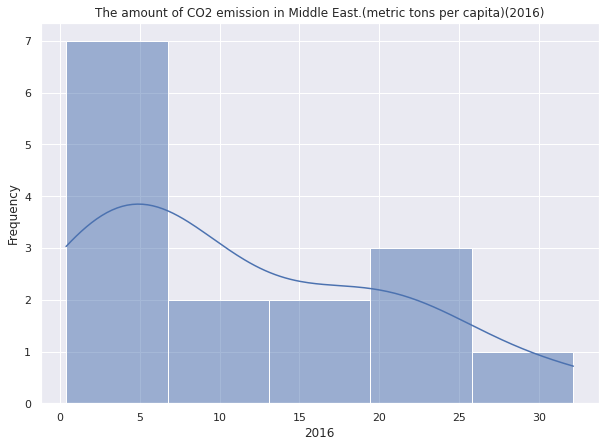

In [59]:
me_hist2016 = sns.histplot(x="2016",data=co2016,kde=True)
me_hist2016.set(title="The amount of CO2 emission in Middle East.(metric tons per capita)(2016)",ylabel="Frequency")
me_hist2016 = me_hist2016.get_figure()

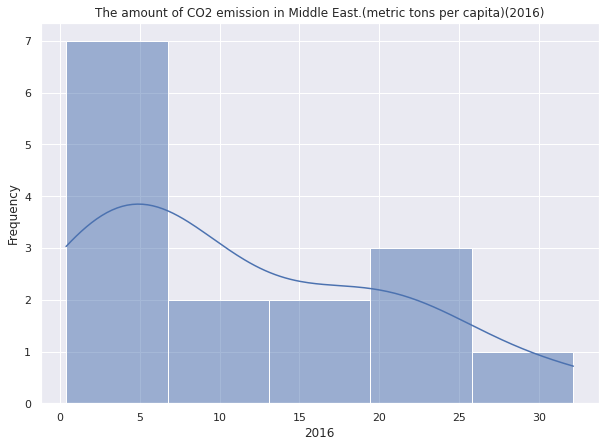

In [60]:
me_hist2016_no = sns.histplot(x="2016",data=co2016_no,kde=True)
me_hist2016_no.set(title="The amount of CO2 emission in Middle East.(metric tons per capita)(2016)",ylabel="Frequency")
me_hist2016_no = me_hist2016_no.get_figure()

<i>South Asia

In [61]:
#South Asia 2006 data with outliers.
co2006 = co2_analyze[co2_analyze["Region"]=="South Asia"]
#South Asia 2006 data without outliers.
co2006_no = remove_outlier_IQR(co2006,"2006")
#South Asia 2016 data with outliers.
co2016 = co2_analyze[co2_analyze["Region"]=="South Asia"]
co2016_no = remove_outlier_IQR(co2016,"2016")

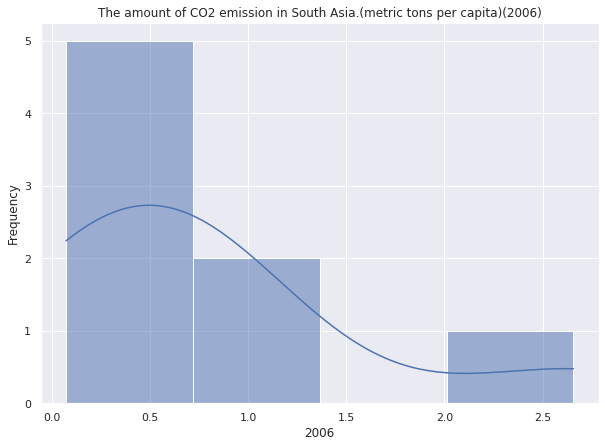

In [62]:
sa_hist2006 = sns.histplot(x="2006",data=co2006,kde=True)
sa_hist2006.set(title="The amount of CO2 emission in South Asia.(metric tons per capita)(2006)",ylabel="Frequency")
sa_hist2006 = sa_hist2006.get_figure()

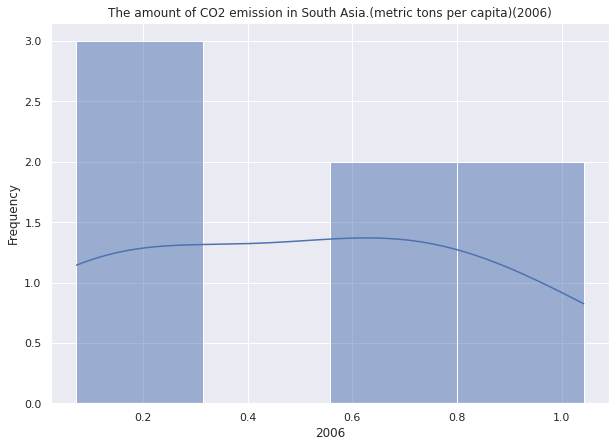

In [63]:
sa_hist2006_no = sns.histplot(x="2006",data=co2006_no,kde=True)
sa_hist2006_no.set(title="The amount of CO2 emission in South Asia.(metric tons per capita)(2006)",ylabel="Frequency")
sa_hist2006_no = sa_hist2006_no.get_figure()

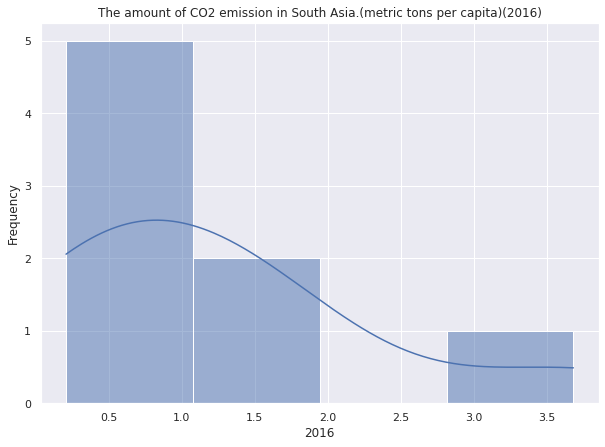

In [64]:
sa_hist2016 = sns.histplot(x="2016",data=co2016,kde=True)
sa_hist2016.set(title="The amount of CO2 emission in South Asia.(metric tons per capita)(2016)",ylabel="Frequency")
sa_hist2016 = sa_hist2016.get_figure()

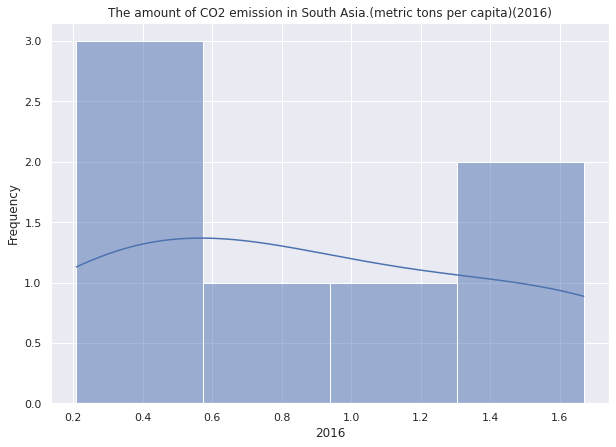

In [65]:
sa_hist2016_no = sns.histplot(x="2016",data=co2016_no,kde=True)
sa_hist2016_no.set(title="The amount of CO2 emission in South Asia.(metric tons per capita)(2016)",ylabel="Frequency")
sa_hist2016_no = sa_hist2016_no.get_figure()

<b>Analyze of forest data.

<i>North America

In [66]:
#North America 2006 data with outliers.
forest2006 = forest_analyze[forest_analyze["Region"]=="North America"]
#North America 2006 data without outliers.
forest2006_no = remove_outlier_IQR(forest2006,"2006")
#North America 2016 data with outliers.
forest2016 = forest_analyze[forest_analyze["Region"]=="North America"]
forest2016_no = remove_outlier_IQR(forest2016,"2016")

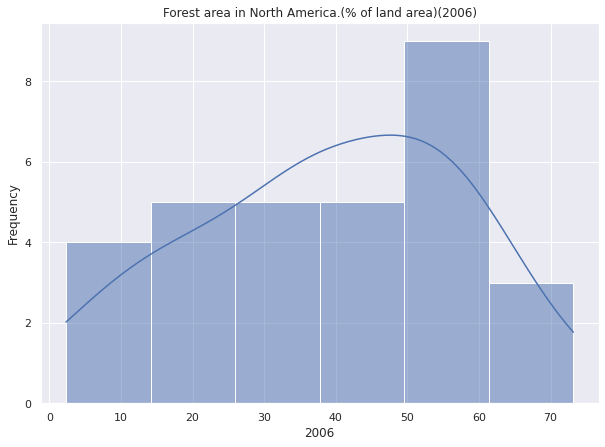

In [67]:
na_hist2006 = sns.histplot(x="2006",data=forest2006,kde=True)
na_hist2006.set(title="Forest area in North America.(% of land area)(2006)",ylabel="Frequency")
na_hist2006 = na_hist2006.get_figure()

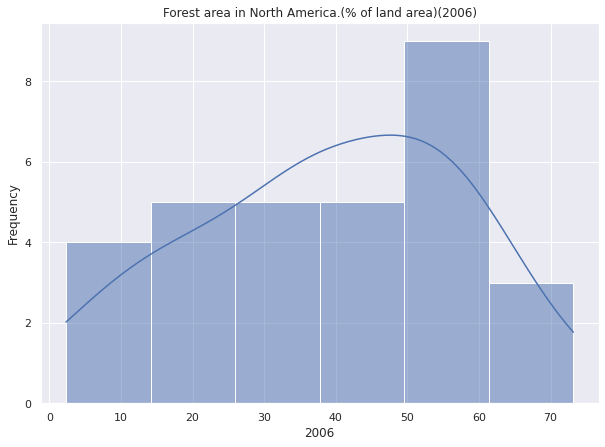

In [68]:
na_hist2006_no = sns.histplot(x="2006",data=forest2006_no,kde=True)
na_hist2006_no.set(title="Forest area in North America.(% of land area)(2006)",ylabel="Frequency")
na_hist2006_no = na_hist2006_no.get_figure()

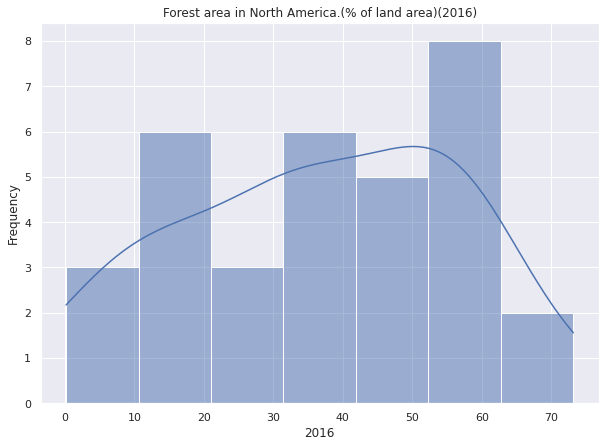

In [69]:
na_hist2016 = sns.histplot(x="2016",data=forest2016,kde=True)
na_hist2016.set(title="Forest area in North America.(% of land area)(2016)",ylabel="Frequency")
na_hist2016 = na_hist2016.get_figure()

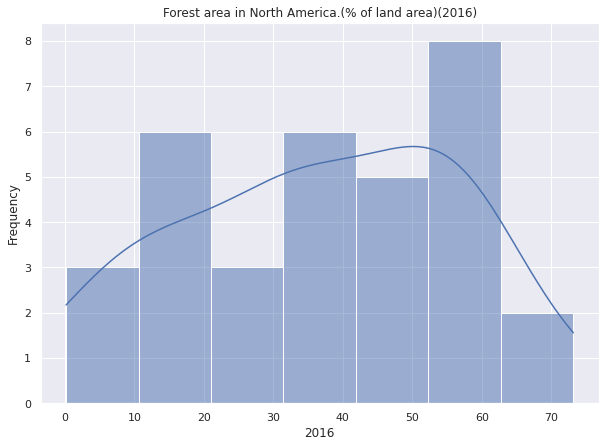

In [70]:
na_hist2016_no = sns.histplot(x="2016",data=forest2016_no,kde=True)
na_hist2016_no.set(title="Forest area in North America.(% of land area)(2016)",ylabel="Frequency")
na_hist2016_no = na_hist2016_no.get_figure()

<i>Middle East

In [71]:
#Middle East 2006 data with outliers.
forest2006 = forest_analyze[forest_analyze["Region"]=="Middle East"]
#Middle East 2006 data without outliers.
forest2006_no = remove_outlier_IQR(forest2006,"2006")
#Middle East 2016 data with outliers.
forest2016 = forest_analyze[forest_analyze["Region"]=="Middle East"]
forest2016_no = remove_outlier_IQR(forest2016,"2016")

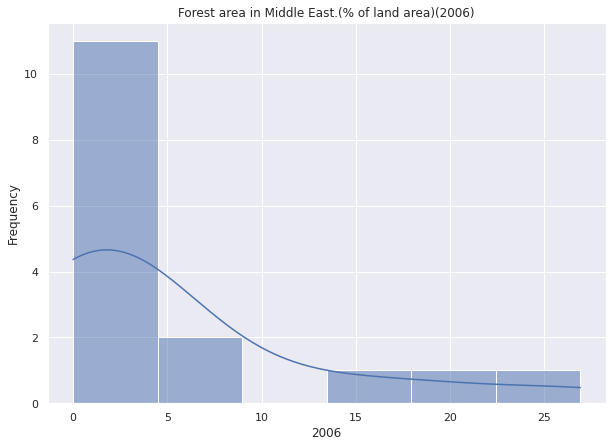

In [72]:
me_hist2006 = sns.histplot(x="2006",data=forest2006,kde=True)
me_hist2006.set(title="Forest area in Middle East.(% of land area)(2006)",ylabel="Frequency")
me_hist2006 = me_hist2006.get_figure()

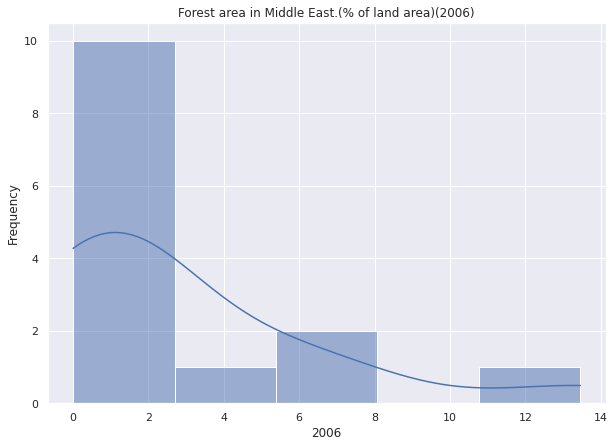

In [73]:
me_hist2006_no = sns.histplot(x="2006",data=forest2006_no,kde=True)
me_hist2006_no.set(title="Forest area in Middle East.(% of land area)(2006)",ylabel="Frequency")
me_hist2006_no = me_hist2006_no.get_figure()

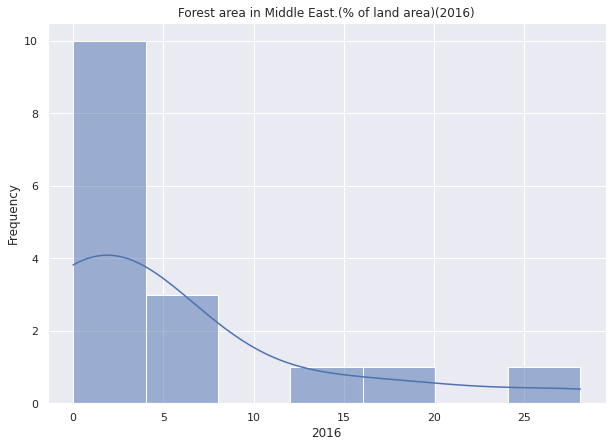

In [74]:
me_hist2016 = sns.histplot(x="2016",data=forest2016,kde=True)
me_hist2016.set(title="Forest area in Middle East.(% of land area)(2016)",ylabel="Frequency")
me_hist2016 = me_hist2016.get_figure()

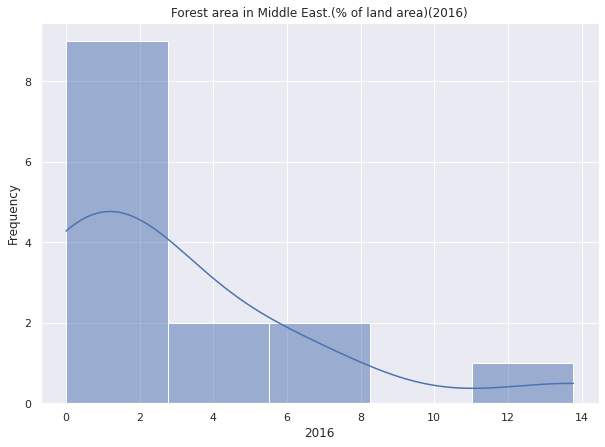

In [75]:
me_hist2016_no = sns.histplot(x="2016",data=forest2016_no,kde=True)
me_hist2016_no.set(title="Forest area in Middle East.(% of land area)(2016)",ylabel="Frequency")
me_hist2016_no = me_hist2016_no.get_figure()

<i>South Asia

In [76]:
#South Asia 2006 data with outliers.
forest2006 = forest_analyze[forest_analyze["Region"]=="South Asia"]
#South Asia 2006 data without outliers.
forest2006_no = remove_outlier_IQR(forest2006,"2006")
#South Asia 2016 data with outliers.
forest2016 = forest_analyze[forest_analyze["Region"]=="South Asia"]
forest2016_no = remove_outlier_IQR(forest2016,"2016")

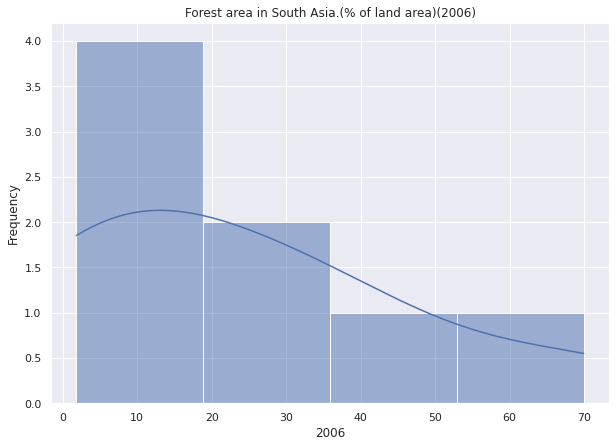

In [77]:
sa_hist2006 = sns.histplot(x="2006",data=forest2006,kde=True)
sa_hist2006.set(title="Forest area in South Asia.(% of land area)(2006)",ylabel="Frequency")
sa_hist2006 = sa_hist2006.get_figure()

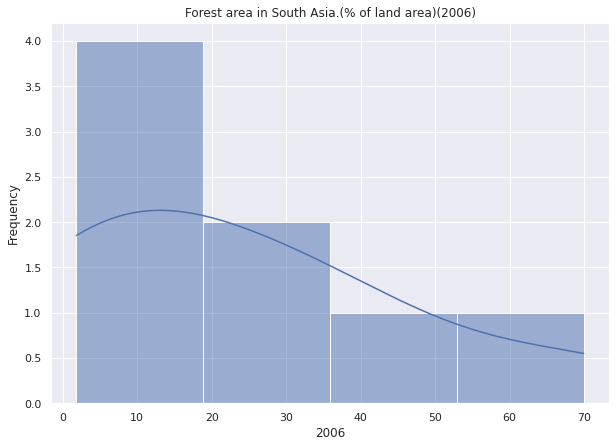

In [78]:
sa_hist2006_no = sns.histplot(x="2006",data=forest2006_no,kde=True)
sa_hist2006_no.set(title="Forest area in South Asia.(% of land area)(2006)",ylabel="Frequency")
sa_hist2006_no = sa_hist2006_no.get_figure()

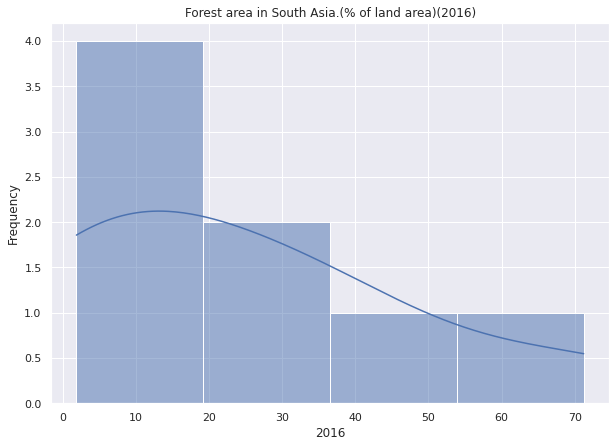

In [79]:
sa_hist2016 = sns.histplot(x="2016",data=forest2016,kde=True)
sa_hist2016.set(title="Forest area in South Asia.(% of land area)(2016)",ylabel="Frequency")
sa_hist2016 = sa_hist2016.get_figure()

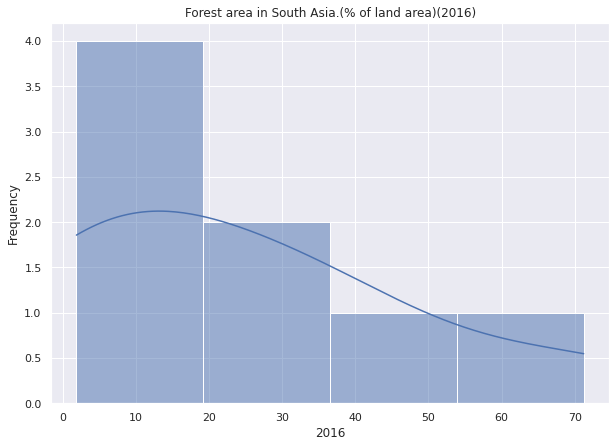

In [80]:
sa_hist2016_no = sns.histplot(x="2016",data=forest2016_no,kde=True)
sa_hist2016_no.set(title="Forest area in South Asia.(% of land area)(2016)",ylabel="Frequency")
sa_hist2016_no = sa_hist2016_no.get_figure()

<b><h>Part 2.2


<b><p>In depth analysis of environment data in 3 regions and Thailand.(cont.)<p></b><br>
<p2>We are going to focus on North America, Middle East, South Asia and Thailand.<p2>

But in this part, we're going to focus on statistics describing the data.

<b>Analyze drinking water data.

<i>North America

In [81]:
#North America 2006 data with outliers.
water2006 = water_analyze[water_analyze["Region"]=="North America"]
#North America 2006 data without outliers.
water2006_no = remove_outlier_IQR(water2006,"2006")
#North America 2016 data with outliers.
water2016 = water_analyze[water_analyze["Region"]=="North America"]
water2016_no = remove_outlier_IQR(water2016,"2016")

In [82]:
water2006["2006"].describe()

count    32.000000
mean     93.362284
std       7.498839
min      60.247379
25%      91.659322
50%      94.633220
75%      98.169703
max      99.948641
Name: 2006, dtype: float64

In [83]:
water2006_no["2006"].describe()

count    30.000000
mean     94.883665
std       3.806806
min      84.604553
25%      92.776978
50%      95.336790
75%      98.312856
max      99.948641
Name: 2006, dtype: float64

In [84]:
water2016["2016"].describe()

count    33.000000
mean     95.415305
std       6.525568
min      65.023017
25%      95.145220
50%      96.579888
75%      98.718267
max      99.903140
Name: 2016, dtype: float64

In [85]:
water2016_no["2016"].describe()

count    31.000000
mean     96.847293
std       2.445515
min      90.561207
25%      95.365918
50%      96.739186
75%      98.802614
max      99.903140
Name: 2016, dtype: float64

<i>Middle East

In [86]:
#Middle East 2006 data with outliers.
water2006 = water_analyze[water_analyze["Region"]=="Middle East"]
#Middle East 2006 data without outliers.
water2006_no = remove_outlier_IQR(water2006,"2006")
#Middle East 2016 data with outliers.
water2016 = water_analyze[water_analyze["Region"]=="Middle East"]
water2016_no = remove_outlier_IQR(water2016,"2016")

In [87]:
water2006["2006"].describe()

count     16.000000
mean      92.444401
std       13.350310
min       46.075828
25%       91.330006
50%       96.726261
75%       99.966032
max      100.000000
Name: 2006, dtype: float64

In [88]:
water2006_no["2006"].describe()

count     15.000000
mean      95.535639
std        5.210434
min       86.181511
25%       92.746086
50%       98.107350
75%       99.977354
max      100.000000
Name: 2006, dtype: float64

In [89]:
water2016["2016"].describe()

count     16.000000
mean      94.749541
std       10.589868
min       56.785619
25%       94.769414
50%       97.971614
75%       99.828403
max      100.000000
Name: 2016, dtype: float64

In [90]:
water2016_no["2016"].describe()

count     15.000000
mean      97.280469
std        3.216434
min       90.687423
25%       95.775248
50%       98.993880
75%       99.876046
max      100.000000
Name: 2016, dtype: float64

<i>South Asia

In [91]:
#South Asia 2006 data with outliers.
water2006 = water_analyze[water_analyze["Region"]=="South Asia"]
#South Asia 2006 data without outliers.
water2006_no = remove_outlier_IQR(water2006,"2006")
#South Asia 2016 data with outliers.
water2016 = water_analyze[water_analyze["Region"]=="South Asia"]
water2016_no = remove_outlier_IQR(water2016,"2016")

In [92]:
water2006["2006"].describe()

count     8.000000
mean     82.295577
std      18.420752
min      38.475460
25%      83.557970
50%      86.037700
75%      90.788069
max      95.994555
Name: 2006, dtype: float64

In [93]:
water2006_no["2006"].describe()

count     7.000000
mean     88.555593
std       5.488645
min      83.276504
25%      83.809114
50%      88.108965
75%      92.445451
max      95.994555
Name: 2006, dtype: float64

In [94]:
water2016["2016"].describe()

count     8.000000
mean     89.316723
std      11.065998
min      64.054883
25%      88.532331
50%      90.201556
75%      96.935577
max      99.114093
Name: 2016, dtype: float64

In [95]:
water2016_no["2016"].describe()

count     7.000000
mean     92.925557
std       4.616416
min      88.277109
25%      89.106887
50%      90.806744
75%      97.033589
max      99.114093
Name: 2016, dtype: float64

<i>Thailand

In [96]:
water2006 = water_analyze[water_analyze["Region"]=="Thailand"]
water2016 = water_analyze[water_analyze["Region"]=="Thailand"]

In [97]:
water2006["2006"].describe()

count     1.000000
mean     96.279146
std            NaN
min      96.279146
25%      96.279146
50%      96.279146
75%      96.279146
max      96.279146
Name: 2006, dtype: float64

In [98]:
water2016["2016"].describe()

count     1.00000
mean     99.44567
std           NaN
min      99.44567
25%      99.44567
50%      99.44567
75%      99.44567
max      99.44567
Name: 2016, dtype: float64

<b>Analyze CO2 emission.

<i>North America

In [99]:
#North America 2006 data with outliers.
co2006 = co2_analyze[co2_analyze["Region"]=="North America"]
#North America 2006 data without outliers.
co2006_no = remove_outlier_IQR(co2006,"2006")
#North America 2016 data with outliers.
co2016 = co2_analyze[co2_analyze["Region"]=="North America"]
co2016_no = remove_outlier_IQR(co2016,"2016")

In [100]:
co2006["2006"].describe()

count    23.000000
mean      4.632674
std       5.370264
min       0.184060
25%       1.630090
50%       2.403914
75%       5.078482
max      18.957644
Name: 2006, dtype: float64

In [101]:
co2006_no["2006"].describe()

count    20.000000
mean      2.696156
std       1.722234
min       0.184060
25%       1.429542
50%       2.318714
75%       4.230364
max       6.102129
Name: 2006, dtype: float64

In [102]:
co2016["2016"].describe()

count    23.000000
mean      4.152318
std       4.369211
min       0.313654
25%       1.706797
50%       2.524296
75%       4.712948
max      15.244747
Name: 2016, dtype: float64

In [103]:
co2016_no["2016"].describe()

count    20.000000
mean      2.594666
std       1.545733
min       0.313654
25%       1.518913
50%       2.488199
75%       2.972283
max       5.794831
Name: 2016, dtype: float64

<i>Middle East

In [104]:
#North America 2006 data with outliers.
co2006 = co2_analyze[co2_analyze["Region"]=="Middle East"]
#Middle East 2006 data without outliers.
co2006_no = remove_outlier_IQR(co2006,"2006")
#Middle East 2016 data with outliers.
co2016 = co2_analyze[co2_analyze["Region"]=="Middle East"]
co2016_no = remove_outlier_IQR(co2016,"2016")

In [105]:
co2006["2006"].describe()

count    15.000000
mean     12.599432
std      12.329773
min       0.938241
25%       3.388123
50%       7.594394
75%      18.727315
max      43.981445
Name: 2006, dtype: float64

In [106]:
co2006_no["2006"].describe()

count    14.000000
mean     10.357859
std       9.085705
min       0.938241
25%       3.377266
50%       7.275134
75%      14.254535
max      29.351285
Name: 2006, dtype: float64

In [107]:
co2016["2016"].describe()

count    15.000000
mean     11.295772
std       9.623630
min       0.400468
25%       4.417195
50%       7.613494
75%      19.170760
max      32.128042
Name: 2016, dtype: float64

In [108]:
co2016_no["2016"].describe()

count    15.000000
mean     11.295772
std       9.623630
min       0.400468
25%       4.417195
50%       7.613494
75%      19.170760
max      32.128042
Name: 2016, dtype: float64

<i>South Asia

In [109]:
#North America 2006 data with outliers.
co2006 = co2_analyze[co2_analyze["Region"]=="South Asia"]
#South Asia 2006 data without outliers.
co2006_no = remove_outlier_IQR(co2006,"2006")
#South Asia 2016 data with outliers.
co2016 = co2_analyze[co2_analyze["Region"]=="South Asia"]
co2016_no = remove_outlier_IQR(co2016,"2016")

In [110]:
co2006["2006"].describe()

count    8.000000
mean     0.771662
std      0.834874
min      0.073393
25%      0.216192
50%      0.619266
75%      0.866230
max      2.656578
Name: 2006, dtype: float64

In [111]:
co2006_no["2006"].describe()

count    7.000000
mean     0.502389
std      0.369378
min      0.073393
25%      0.177632
50%      0.608454
75%      0.718886
max      1.041840
Name: 2006, dtype: float64

In [112]:
co2016["2016"].describe()

count    8.000000
mean     1.242188
std      1.130102
min      0.208857
25%      0.435728
50%      0.960519
75%      1.653668
max      3.680298
Name: 2016, dtype: float64

In [113]:
co2016_no["2016"].describe()

count    7.000000
mean     0.893887
std      0.598099
min      0.208857
25%      0.404680
50%      0.886749
75%      1.341323
max      1.669594
Name: 2016, dtype: float64

<i>Thailand

In [114]:
co2006 = co2_analyze[co2_analyze["Region"]=="Thailand"]
co2016 = co2_analyze[co2_analyze["Region"]=="Thailand"]

In [115]:
co2006["2006"].describe()

count    1.000000
mean     3.313806
std           NaN
min      3.313806
25%      3.313806
50%      3.313806
75%      3.313806
max      3.313806
Name: 2006, dtype: float64

In [116]:
co2016["2016"].describe()

count    1.000000
mean     3.780122
std           NaN
min      3.780122
25%      3.780122
50%      3.780122
75%      3.780122
max      3.780122
Name: 2016, dtype: float64

<b>Analyze of forest data.

<i>North America

In [117]:
#North America 2006 data with outliers.
forest2006 = forest_analyze[forest_analyze["Region"]=="North America"]
#North America 2006 data without outliers.
forest2006_no = remove_outlier_IQR(forest2006,"2006")
#North America 2016 data with outliers.
forest2016 = forest_analyze[forest_analyze["Region"]=="North America"]
forest2016_no = remove_outlier_IQR(forest2016,"2016")

In [118]:
forest2006["2006"].describe()

count    31.000000
mean     38.749920
std      18.611497
min       2.333333
25%      25.013698
50%      38.828469
75%      52.973196
max      73.179487
Name: 2006, dtype: float64

In [119]:
forest2006_no["2006"].describe()

count    31.000000
mean     38.749920
std      18.611497
min       2.333333
25%      25.013698
50%      38.828469
75%      52.973196
max      73.179487
Name: 2006, dtype: float64

In [120]:
forest2016["2016"].describe()

count    33.000000
mean     36.499210
std      19.779419
min       0.157658
25%      19.045455
50%      34.055994
75%      53.678670
max      73.179487
Name: 2016, dtype: float64

In [121]:
forest2016_no["2016"].describe()

count    33.000000
mean     36.499210
std      19.779419
min       0.157658
25%      19.045455
50%      34.055994
75%      53.678670
max      73.179487
Name: 2016, dtype: float64

<i>Middle East

In [122]:
#Middle East 2006 data with outliers.
forest2006 = forest_analyze[forest_analyze["Region"]=="Middle East"]
#Middle East 2006 data without outliers.
forest2006_no = remove_outlier_IQR(forest2006,"2006")
#Middle East 2016 data with outliers.
forest2016 = forest_analyze[forest_analyze["Region"]=="Middle East"]
forest2016_no = remove_outlier_IQR(forest2016,"2016")

In [123]:
forest2006["2006"].describe()

count    16.000000
mean      5.391962
std       7.797480
min       0.000000
25%       0.579837
50%       1.701564
75%       6.446198
max      26.907979
Name: 2006, dtype: float64

In [124]:
forest2006_no["2006"].describe()

count    14.000000
mean      2.907931
std       3.791154
min       0.000000
25%       0.496269
50%       1.314098
75%       3.954832
max      13.458651
Name: 2006, dtype: float64

In [125]:
forest2016["2016"].describe()

count    16.000000
mean      5.515356
std       8.019548
min       0.000000
25%       0.710540
50%       1.792373
75%       6.494799
max      28.104804
Name: 2016, dtype: float64

In [126]:
forest2016_no["2016"].describe()

count    14.000000
mean      2.961440
std       3.820713
min       0.000000
25%       0.539836
50%       1.391303
75%       4.061594
max      13.776149
Name: 2016, dtype: float64

<i>South Asia

In [127]:
#South Asia 2006 data with outliers.
forest2006 = forest_analyze[forest_analyze["Region"]=="South Asia"]
#South Asia 2006 data without outliers.
forest2006_no = remove_outlier_IQR(forest2006,"2006")
#South Asia 2016 data with outliers.
forest2016 = forest_analyze[forest_analyze["Region"]=="South Asia"]
forest2016_no = remove_outlier_IQR(forest2016,"2016")

In [128]:
forest2006["2006"].describe()

count     8.000000
mean     24.099558
std      23.523741
min       1.850994
25%       4.828669
50%      18.861479
75%      35.730564
max      69.931369
Name: 2006, dtype: float64

In [129]:
forest2006_no["2006"].describe()

count     8.000000
mean     24.099558
std      23.523741
min       1.850994
25%       4.828669
50%      18.861479
75%      35.730564
max      69.931369
Name: 2006, dtype: float64

In [130]:
forest2016["2016"].describe()

count     8.000000
mean     24.393998
std      24.024655
min       1.850994
25%       4.446798
50%      19.190298
75%      36.155763
max      71.234270
Name: 2016, dtype: float64

In [131]:
forest2016_no["2016"].describe()

count     8.000000
mean     24.393998
std      24.024655
min       1.850994
25%       4.446798
50%      19.190298
75%      36.155763
max      71.234270
Name: 2016, dtype: float64

<i>Thailand

In [132]:
forest2006 = forest_analyze[forest_analyze["Region"]=="Thailand"]
forest2016 = forest_analyze[forest_analyze["Region"]=="Thailand"]

In [133]:
forest2006["2006"].describe()

count     1.00000
mean     38.44859
std           NaN
min      38.44859
25%      38.44859
50%      38.44859
75%      38.44859
max      38.44859
Name: 2006, dtype: float64

In [134]:
forest2016["2016"].describe()

count     1.000000
mean     39.180646
std            NaN
min      39.180646
25%      39.180646
50%      39.180646
75%      39.180646
max      39.180646
Name: 2016, dtype: float64

<b><h>Part 3

In this part, we are going to analyze the correlation between the environment data and the economics data.

First, we import the economics data.

In [135]:
gdp = pd.read_excel("/mnt/d/mywork/Stat/gdp.xlsx")
population = pd.read_excel("/mnt/d/mywork/Stat/population.xlsx")
unemployment = pd.read_excel("/mnt/d/mywork/Stat/unemployment.xlsx")

<p2>The economics data contains three datasets<p2><br>
<p2>GDP -> GDP (current US$).<p2><br>
<p2>Population -> Population, total.<p2><br>
<p2>Unemployment -> Unemployment, total (% of total labor force).(national estimate)<p2><br>
<p2>Regions -> Regions that countries belong to.<p2>

<h><b>Data Cleansing<b><h>
<p>All data has been observed in Microsoft Excel.<p>

Replace .. in xlsx using np.nan.

In [136]:
gdp = gdp.replace("..",np.nan)
population = population.replace("..",np.nan)
unemployment = unemployment.replace("..",np.nan)

Drop unused columns.

In [137]:
cols = [1,2,3]
gdp.drop(gdp.columns[cols],axis=1,inplace=True)
population.drop(population.columns[cols],axis=1,inplace=True)
unemployment.drop(unemployment.columns[cols],axis=1,inplace=True)
gdp.drop(gdp.index[217:222],inplace=True)
population.drop(population.index[217:222],inplace=True)
unemployment.drop(unemployment.index[217:222],inplace=True)

Change columns name.

In [138]:
years = ["CountryName"]
years += [str(i) for i in range(1990,2021)]
gdp.set_axis(years,axis=1,inplace=True)
population.set_axis(years,axis=1,inplace=True)
unemployment.set_axis(years,axis=1,inplace=True)

Set indexes, and join data.

In [139]:
gdp.set_index("CountryName",inplace=True)
gdp = gdp.join(region,how="left")
gdp.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,Region,ThirdWorld
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,South Asia,1.0
Albania,2.028554e+09,1.099559e+09,6.521750e+08,1.185315e+09,1.880952e+09,2.392765e+09,3.199641e+09,2.258514e+09,2.545965e+09,3.212122e+09,...,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10,1.540024e+10,1.488763e+10,Eastern Europe,0.0
Algeria,6.204856e+10,4.571561e+10,4.800308e+10,4.994560e+10,4.254318e+10,4.176432e+10,4.694158e+10,4.817761e+10,4.818775e+10,4.864065e+10,...,2.097550e+11,2.138100e+11,1.659793e+11,1.600342e+11,1.700970e+11,1.749109e+11,1.717674e+11,1.450092e+11,Africa,0.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.380000e+08,6.430000e+08,6.730000e+08,6.710000e+08,6.120000e+08,6.390000e+08,6.480000e+08,7.090000e+08,Australia and Oceanea,0.0
Andorra,1.029048e+09,1.106929e+09,1.210014e+09,1.007026e+09,1.017549e+09,1.178739e+09,1.223945e+09,1.180597e+09,1.211932e+09,1.239876e+09,...,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.155065e+09,NaN,Western Europe,0.0


In [140]:
population.set_index("CountryName",inplace=True)
population = population.join(region,how="left")
population.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,Region,ThirdWorld
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,12412311.0,13299016.0,14485543.0,15816601.0,17075728.0,18110662.0,18853444.0,19357126.0,19737770.0,20170847.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,South Asia,1.0
Albania,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,...,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0,Eastern Europe,0.0
Algeria,25758872.0,26400468.0,27028330.0,27635517.0,28213777.0,28757788.0,29266415.0,29742980.0,30192750.0,30623406.0,...,38140135.0,38923688.0,39728020.0,40551398.0,41389174.0,42228415.0,43053054.0,43851043.0,Africa,0.0
American Samoa,47351.0,48682.0,49900.0,51025.0,52099.0,53158.0,54209.0,55227.0,56180.0,57049.0,...,55717.0,55791.0,55806.0,55739.0,55617.0,55461.0,55312.0,55197.0,Australia and Oceanea,0.0
Andorra,54508.0,56666.0,58882.0,60974.0,62676.0,63860.0,64363.0,64318.0,64140.0,64368.0,...,80770.0,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0,Western Europe,0.0


In [141]:
unemployment.set_index("CountryName",inplace=True)
unemployment = unemployment.join(region,how="left")
unemployment.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,Region,ThirdWorld
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.91,NaN,NaN,11.18,NaN,NaN,11.71,South Asia,1.0
Albania,9.50,9.1,26.50,22.30,18.40,12.90,12.3,14.90,17.7,18.4,...,15.87,18.05,17.19,15.42,13.62,12.3,11.47,NaN,Eastern Europe,0.0
Algeria,21.26,20.6,24.38,26.23,27.74,31.84,NaN,25.43,NaN,NaN,...,9.82,10.21,11.21,10.20,13.57,NaN,NaN,NaN,Africa,0.0
American Samoa,5.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia and Oceanea,0.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Europe,0.0


In [142]:
gdp.iloc[:,0:].isna().sum()

1990          40
1991          45
1992          41
1993          38
1994          34
1995          25
1996          25
1997          25
1998          23
1999          22
2000          18
2001          17
2002          12
2003          12
2004          12
2005          12
2006          11
2007          11
2008          10
2009          10
2010           9
2011           7
2012           8
2013           7
2014           7
2015           8
2016           9
2017           9
2018           9
2019          12
2020          24
Region         1
ThirdWorld     1
dtype: int64

In [143]:
population.iloc[:,0:].isna().sum()

1990          0
1991          0
1992          1
1993          1
1994          1
1995          0
1996          0
1997          0
1998          0
1999          0
2000          0
2001          0
2002          0
2003          0
2004          0
2005          0
2006          0
2007          0
2008          0
2009          0
2010          0
2011          0
2012          1
2013          1
2014          1
2015          1
2016          1
2017          1
2018          1
2019          1
2020          1
Region        1
ThirdWorld    1
dtype: int64

In [144]:
unemployment.iloc[:,0:].isna().sum()

1990          141
1991          120
1992          129
1993          125
1994          122
1995          118
1996          111
1997          113
1998          117
1999          108
2000          101
2001           97
2002          100
2003          101
2004           96
2005           85
2006           93
2007           93
2008           97
2009           88
2010           84
2011           88
2012           87
2013           89
2014           79
2015           95
2016           92
2017           91
2018          102
2019          102
2020          134
Region          1
ThirdWorld      1
dtype: int64

<p1>Since 2006 and 2016 have a span of 10 years and both years have a low null value,<p1><br>
<p1>We will choose 2006 to represent the past and 2016 to represent the present.<p1>

In [145]:
water_analyze = water_analyze[["2006","2016"]][(water_analyze["Region"]!="Australia and Oceanea") & (water_analyze["Region"]!="Thailand")]
co2_analyze = co2_analyze[["2006","2016"]][(co2_analyze["Region"]!="Australia and Oceanea") & (co2_analyze["Region"]!="Thailand")]
forest_analyze = forest_analyze[["2006","2016"]][(forest_analyze["Region"]!="Australia and Oceanea") & (forest_analyze["Region"]!="Thailand")]
gdp_analyze = gdp[["2006","2016"]][(gdp["Region"]!="Australia and Oceanea") & (gdp["Region"]!="Thailand")]
population_analyze = population[["2006","2016"]][(population["Region"]!="Australia and Oceanea") & (population["Region"]!="Thailand")]
unemployment_analyze = unemployment[["2006","2016"]][(unemployment["Region"]!="Australia and Oceanea") & (unemployment["Region"]!="Thailand")]

We seperate all data and then merge into one dataframe.

In [146]:
water_analyze.head()
water_analyze = water_analyze.melt(ignore_index=False)

In [147]:
water_analyze.rename(columns={water_analyze.columns[0]:"Year",water_analyze.columns[1]:"Water"},inplace=True)

In [148]:
co2_analyze = co2_analyze.melt(ignore_index=False)
co2_analyze.rename(columns={co2_analyze.columns[0]:"Year",co2_analyze.columns[1]:"CO2"},inplace=True)

In [149]:
res = water_analyze.merge(co2_analyze,left_on=["CountryName","Year"],right_on=["CountryName","Year"])

In [150]:
forest_analyze = forest_analyze.melt(ignore_index=False)
forest_analyze.rename(columns={forest_analyze.columns[0]:"Year",forest_analyze.columns[1]:"Forest"},inplace=True)

In [151]:
res = res.merge(forest_analyze,left_on=["CountryName","Year"],right_on=["CountryName","Year"])

In [152]:
gdp_analyze = gdp_analyze.melt(ignore_index=False)
gdp_analyze.rename(columns={gdp_analyze.columns[0]:"Year",gdp_analyze.columns[1]:"GDP"},inplace=True)

In [153]:
res = res.merge(gdp_analyze,left_on=["CountryName","Year"],right_on=["CountryName","Year"])

In [154]:
population_analyze = population_analyze.melt(ignore_index=False)
population_analyze.rename(columns={population_analyze.columns[0]:"Year",population_analyze.columns[1]:"Population"},inplace=True)

In [155]:
res = res.merge(population_analyze,left_on=["CountryName","Year"],right_on=["CountryName","Year"])

In [156]:
unemployment_analyze = unemployment_analyze.melt(ignore_index=False)
unemployment_analyze.rename(columns={unemployment_analyze.columns[0]:"Year",unemployment_analyze.columns[1]:"Unemployment"},inplace=True)

In [157]:
res = res.merge(unemployment_analyze,left_on=["CountryName","Year"],right_on=["CountryName","Year"])

In [158]:
#res.dropna(inplace=True)

In [159]:
res.sort_values(by=["CountryName","Year"],inplace=True)

In [160]:
res2006 = res[:][res["Year"]=="2006"]
res2016 = res[:][res["Year"]=="2016"]
res.reset_index(inplace=True)

<b><h>Plot heatmap and scatterplot to show correlation between environment data and economics data.

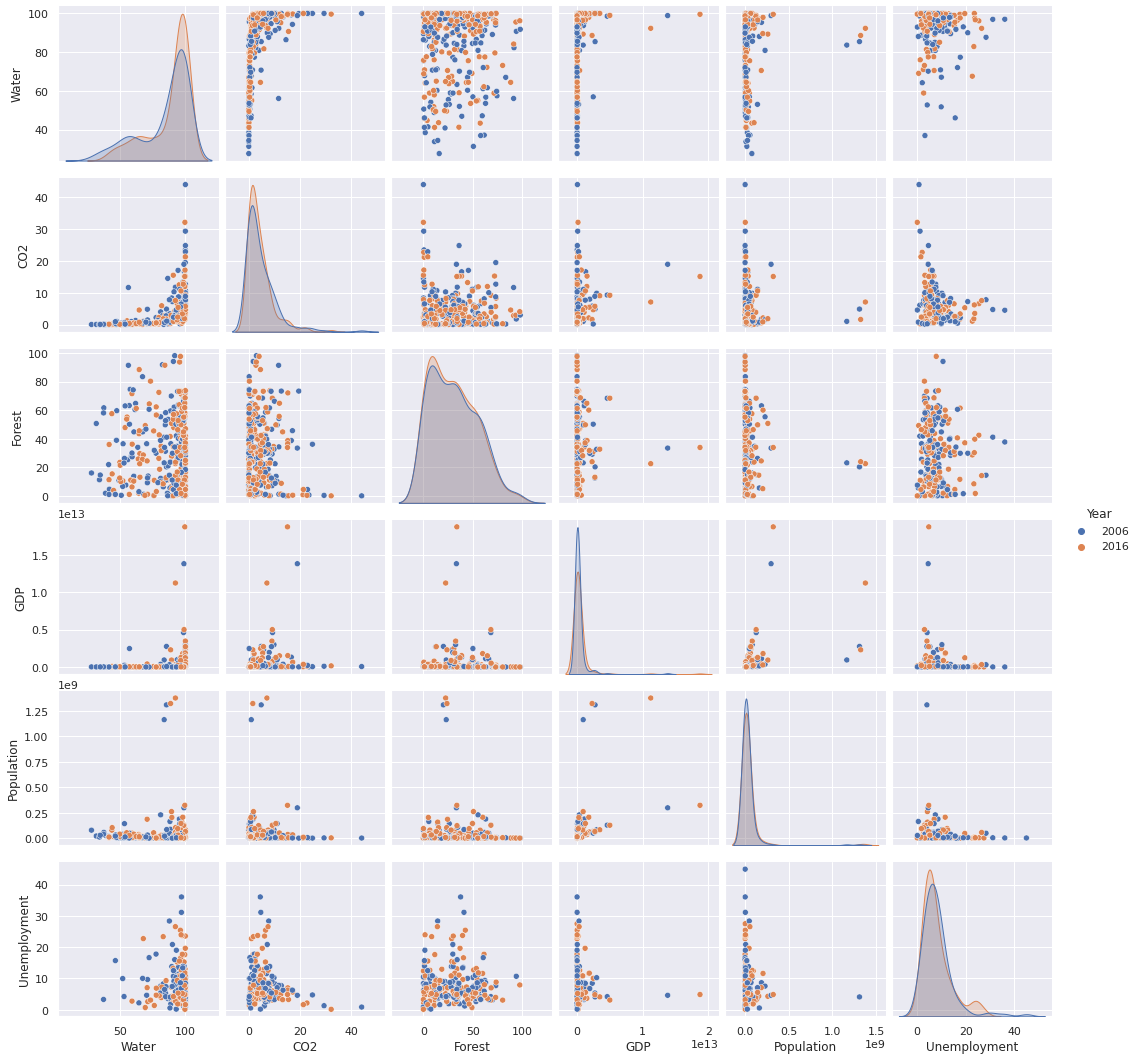

In [161]:
res_pair = sns.pairplot(res,hue="Year")

2006

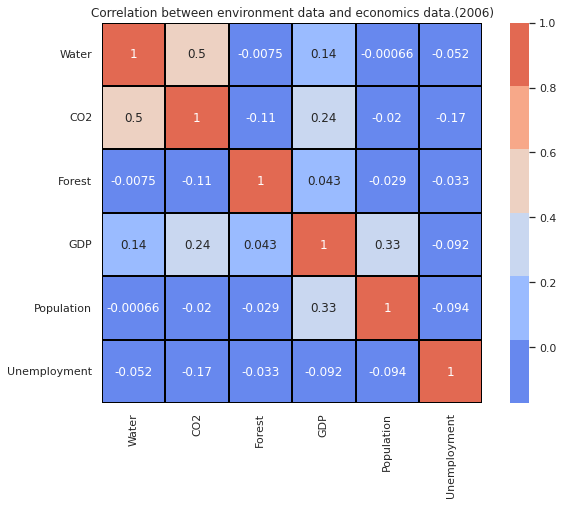

In [162]:
res2006_corr = sns.heatmap(res2006.corr(),
                            square=True,
                            linewidths=0.25,
                            linecolor=(0,0,0),
                            cmap=sns.color_palette("coolwarm"),
                            annot=True)
res2006_corr.set(title="Correlation between environment data and economics data.(2006)")
res2006_corr = res2006_corr.get_figure()

2016

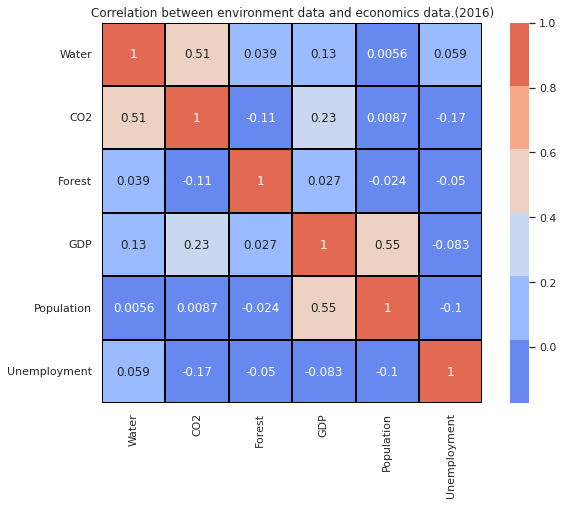

In [163]:
res2016_corr = sns.heatmap(res2016.corr(),
                            square=True,
                            linewidths=0.25,
                            linecolor=(0,0,0),
                            cmap=sns.color_palette("coolwarm"),
                            annot=True)
res2016_corr.set(title="Correlation between environment data and economics data.(2016)")
res2016_corr = res2016_corr.get_figure()

<b><h>Part 4

<p2>In this part, We will dig deeper into the correlation between environment data and economics data.<p2><br>

<p3>We'll choose three pairs of data and try to explain them with more visualization.<p3>

<b>CO2 and GDP.(Highest correlation coefficient between two datasets)

In [164]:
co2_analyze = co2
co2_analyze = co2_analyze.melt(ignore_index=False)
co2_analyze.rename(columns={co2_analyze.columns[0]:"Year",co2_analyze.columns[1]:"CO2"},inplace=True)
co2_analyze.reset_index(inplace=True)


In [165]:
gdp_analyze = gdp.melt(ignore_index=False)
gdp_analyze.rename(columns={gdp_analyze.columns[0]:"Year",gdp_analyze.columns[1]:"GDP"},inplace=True)
gdp_analyze.reset_index(inplace=True)

In [166]:
res = co2_analyze.merge(gdp_analyze,on=["CountryName","Year"])
res.dropna(inplace=True)

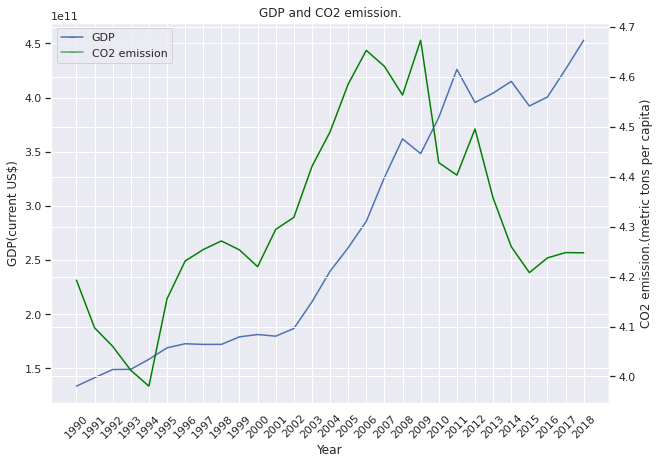

In [167]:
ax = sns.lineplot(data = res[["Year","GDP"]]
                  , x ='Year'
                  , y = 'GDP'
                  , ci=None)

ax2 = ax.twinx()
ax2 = sns.lineplot(data = res[["Year","CO2"]]
                  , x ='Year'
                  , y = 'CO2'
                  , color='green'
                  , ci=None)

ax.tick_params(axis='x', rotation=45)
ax.set_title("GDP and CO2 emission.")
ax.set(ylabel="GDP(current US$)")
ax2.set(ylabel="CO2 emission.(metric tons per capita)")

from matplotlib.lines import Line2D
ax.legend(handles=[
    Line2D([], [], marker='_', label='GDP'),
    Line2D([], [], marker='_', color="g", label='CO2 emission')]
)

<b><h>Water and GDP.(No correlation)

In [168]:
water_analyze = water
water_analyze = water_analyze.melt(ignore_index=False)
water_analyze.rename(columns={water_analyze.columns[0]:"Year",water_analyze.columns[1]:"Water"},inplace=True)
water_analyze.reset_index(inplace=True)
water_analyze.dropna(inplace=True)

In [169]:
gdp = pd.read_excel("/mnt/d/mywork/Stat/gdp.xlsx")
gdp = gdp.replace("..",np.nan)

cols = [1,2,3]
gdp.drop(gdp.columns[cols],axis=1,inplace=True)
gdp.drop(gdp.index[217:222],inplace=True)
years = ["CountryName"]
years += [str(i) for i in range(1990,2021)]
gdp.set_axis(years,axis=1,inplace=True)
gdp.set_index("CountryName",inplace=True)

gdp_analyze = gdp.melt(ignore_index=False)
gdp_analyze.rename(columns={gdp_analyze.columns[0]:"Year",gdp_analyze.columns[1]:"GDP"},inplace=True)
gdp_analyze.reset_index(inplace=True)
gdp.dropna(inplace=True)

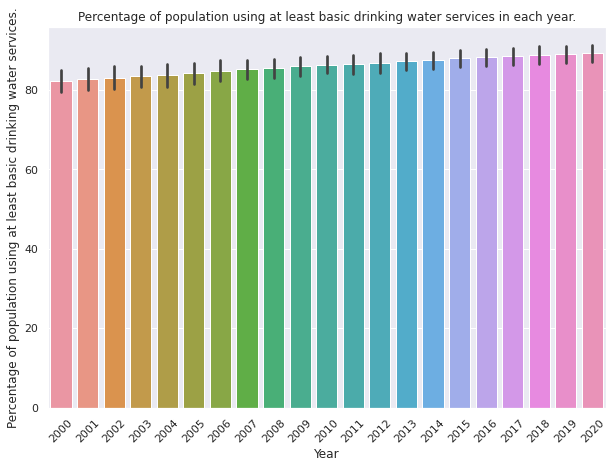

In [170]:
water_bar = sns.barplot(x="Year",y="Water",data=water_analyze)
water_bar.set(title="Percentage of population using at least basic drinking water services in each year.",ylabel="Percentage of population using at least basic drinking water services.")
water_bar.tick_params(axis='x', rotation=45)
water_bar = water_bar.get_figure()

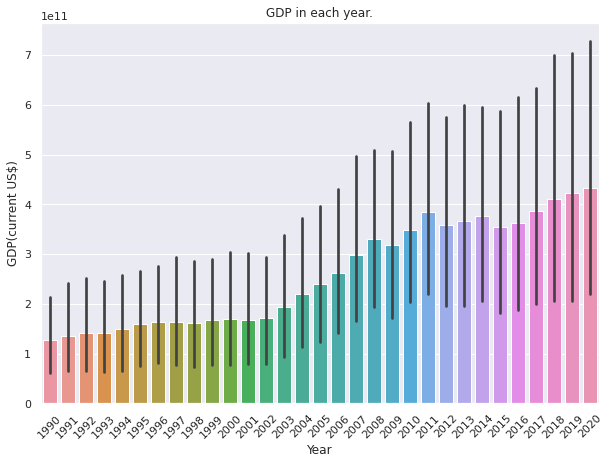

In [171]:
gdp_bar = sns.barplot(x="Year",y="GDP",data=gdp_analyze)
gdp_bar.set(title="GDP in each year.",ylabel="GDP(current US$)")
gdp_bar.tick_params(axis='x', rotation=45)
gdp_bar = gdp_bar.get_figure()

<b>For the last part, We will take a look at geovisualization in google sheet<b>

<b>But we need to convert data to csv first.

In [172]:
res.to_csv("result_stat.csv",index=False)

In [173]:
res.head()

,CountryName,Year,CO2,GDP
1,Albania,1990,1.840841,2028553750.0
2,Algeria,1990,2.635597,62048562947.250908
4,Andorra,1990,7.521832,1029048481.880509
5,Angola,1990,0.534250,11236275842.735785
6,Antigua and Barbuda,1990,3.358227,459470370.37037
